In [13]:
# Cài đặt thư viện statsmodels nếu chưa có
!pip install statsmodels

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from itertools import product
import pandas as pd
from google.colab import drive

# Kết nối Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from itertools import product
import os

class StockModelEvaluation:
    def __init__(self):
        self.results_additive = []
        self.results_multiplicative = []

    def prepare_data(self, df, ticker):
        """
        Chuẩn bị dữ liệu cho một mã chứng khoán bằng cách thiết lập chỉ mục, đổi tên các cột,
        và chọn các cột cần thiết.
        """
        df_ticker = df[df['ticker'] == ticker].set_index('time')
        df_ticker = df_ticker.rename(columns={'close': 'y'})
        df_ticker = df_ticker[['y']]
        return df_ticker

    def optimize_holt_winters(self, train_df, seasonal='add', seasonal_periods=12):
        best_mae = float('inf')
        best_params = None

        alphas = betas = gammas = np.arange(0.1, 1.0, 0.1)
        params = product(alphas, betas, gammas)

        for alpha, beta, gamma in params:
            try:
                model = ExponentialSmoothing(
                    train_df['y'],
                    trend='add',
                    seasonal=seasonal,
                    seasonal_periods=seasonal_periods
                ).fit(
                    smoothing_level=alpha,
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma
                )

                forecast = model.fittedvalues
                mae = mean_absolute_error(train_df['y'], forecast)

                if mae < best_mae:
                    best_mae = mae
                    best_params = (alpha, beta, gamma)

            except Exception as e:
                continue

        return best_params

    def fit_and_predict_holt_winters(self, train_df, test_df, ticker, seasonal_mode='add', seasonal_periods=12):
        best_alpha, best_beta, best_gamma = self.optimize_holt_winters(train_df, seasonal=seasonal_mode, seasonal_periods=seasonal_periods)

        model = ExponentialSmoothing(
            train_df['y'],
            trend='add',
            seasonal=seasonal_mode,
            seasonal_periods=seasonal_periods
        ).fit(
            smoothing_level=best_alpha,
            smoothing_trend=best_beta,
            smoothing_seasonal=best_gamma
        )

        forecast = model.forecast(len(test_df)).rename('Holt_Winters_Forecast')

        y_true = test_df['y'].values
        y_pred = forecast.values

        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))

        print(f'Mã chứng khoán: {ticker}, MAE: {mae}, RMSE: {rmse}, Seasonal: {seasonal_mode}')

        result = {
            'ticker': ticker,
            'mae': mae,
            'rmse': rmse,
            'seasonality_mode': seasonal_mode
        }

        if seasonal_mode == 'add':
            self.results_additive.append(result)
        else:
            self.results_multiplicative.append(result)

        return forecast, mae, rmse

    def plot_forecast_holt_winters(self, train_df, forecast, test_df, ticker, seasonality_mode):
        plt.figure(figsize=(10, 6))
        plt.plot(train_df.index, train_df['y'], label='Train', color='blue')
        plt.plot(test_df.index, test_df['y'], label='Test', color='green')
        plt.plot(test_df.index, forecast, label='Prediction', color='orange')
        plt.title(f'Mã chứng khoán: {ticker} - Holt-Winters Seasonality: {seasonality_mode}')
        plt.xlabel('Ngày')
        plt.ylabel('Giá đóng cửa')
        plt.legend()

        # Tự động lưu ảnh
        filename = f"{ticker}_Holt_Winters_{seasonality_mode}.png"
        plt.savefig(filename)
        plt.show()

    def get_results(self):
        results_additive_df = pd.DataFrame(self.results_additive)
        results_multiplicative_df = pd.DataFrame(self.results_multiplicative)
        return results_additive_df, results_multiplicative_df

    def save_results_to_csv(self, results_df, filename):
        results_df.to_csv(filename, index=False)

    def calculate_average_metrics(self, results_df):
        average_mae = results_df['mae'].mean()
        average_rmse = results_df['rmse'].mean()
        return average_mae, average_rmse






In [17]:
# Đường dẫn tới file trên Google Drive
train_file_path = '/content/drive/MyDrive/LuanVan/data/ComVN30_train.csv'
test_file_path = '/content/drive/MyDrive/LuanVan/data/ComVN30_test.csv'

# Đọc dữ liệu
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# Chuyển đổi cột 'time' sang định dạng datetime
train_df['time'] = pd.to_datetime(train_df['time'])
test_df['time'] = pd.to_datetime(test_df['time'])

In [18]:
import warnings
warnings.filterwarnings("ignore")

# Cách sử dụng
evaluator_holt_winters = StockModelEvaluation()
tickers = train_df['ticker'].unique()


Đang xử lý mã chứng khoán (Cộng): SSI
Mã chứng khoán: SSI, MAE: 1573.2246122636873, RMSE: 1901.5614662573141, Seasonal: add


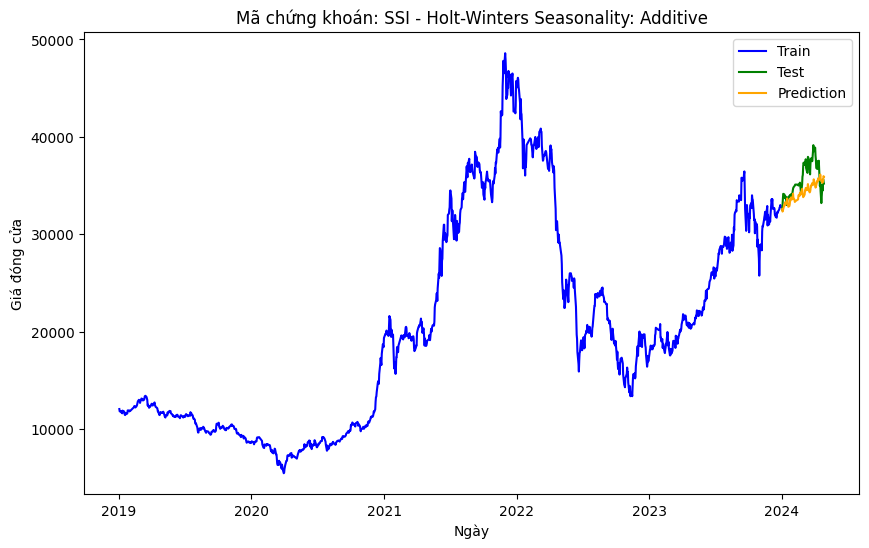

Đang xử lý mã chứng khoán (Cộng): BCM
Mã chứng khoán: BCM, MAE: 2934.994006258014, RMSE: 4445.685507003887, Seasonal: add


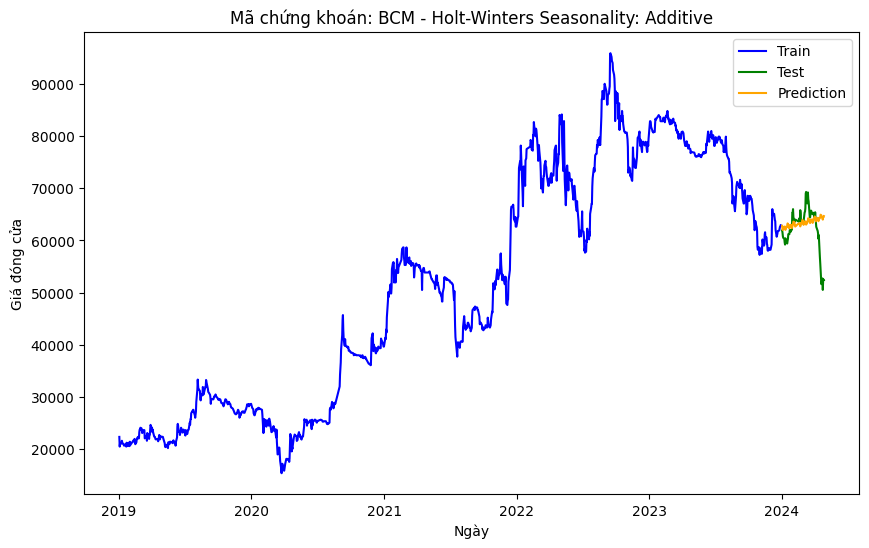

Đang xử lý mã chứng khoán (Cộng): VHM
Mã chứng khoán: VHM, MAE: 6482.263064591893, RMSE: 7597.002772804523, Seasonal: add


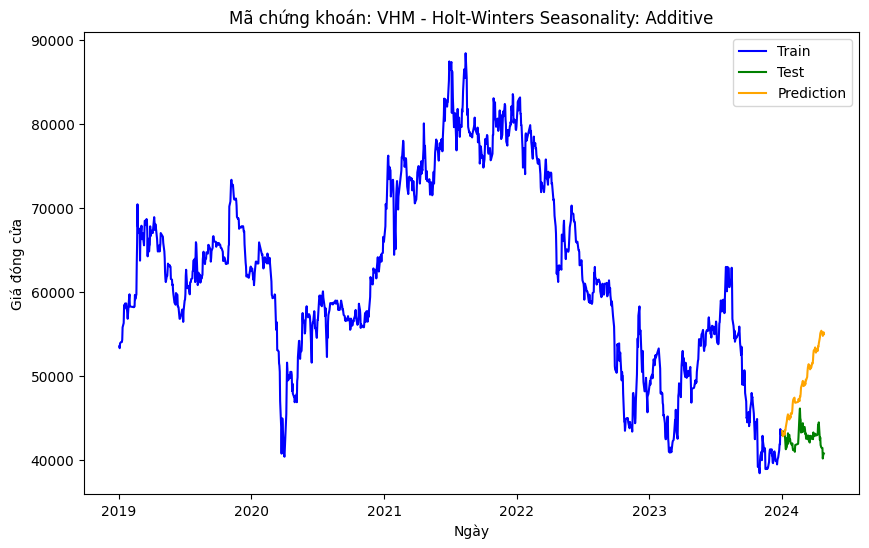

Đang xử lý mã chứng khoán (Cộng): VIC
Mã chứng khoán: VIC, MAE: 1593.9520488158903, RMSE: 1963.2967747077557, Seasonal: add


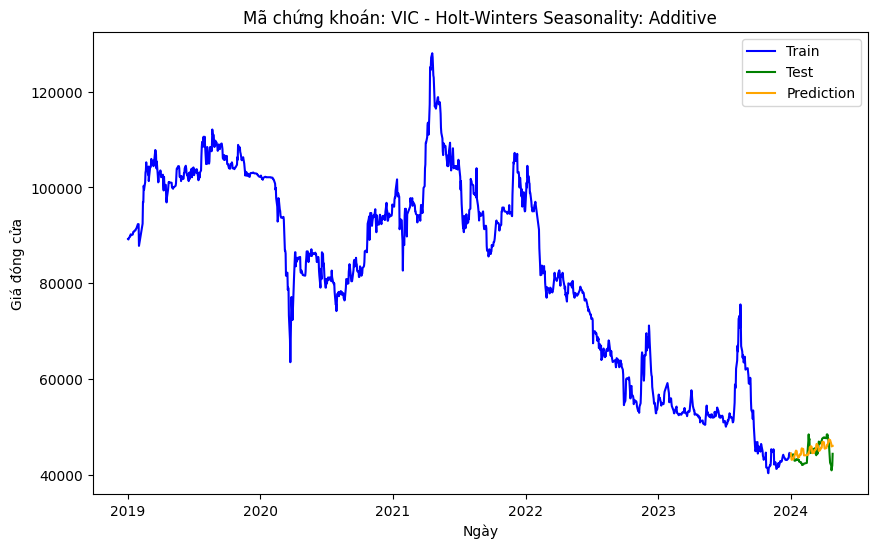

Đang xử lý mã chứng khoán (Cộng): VRE
Mã chứng khoán: VRE, MAE: 1433.206686721055, RMSE: 1759.5095028080873, Seasonal: add


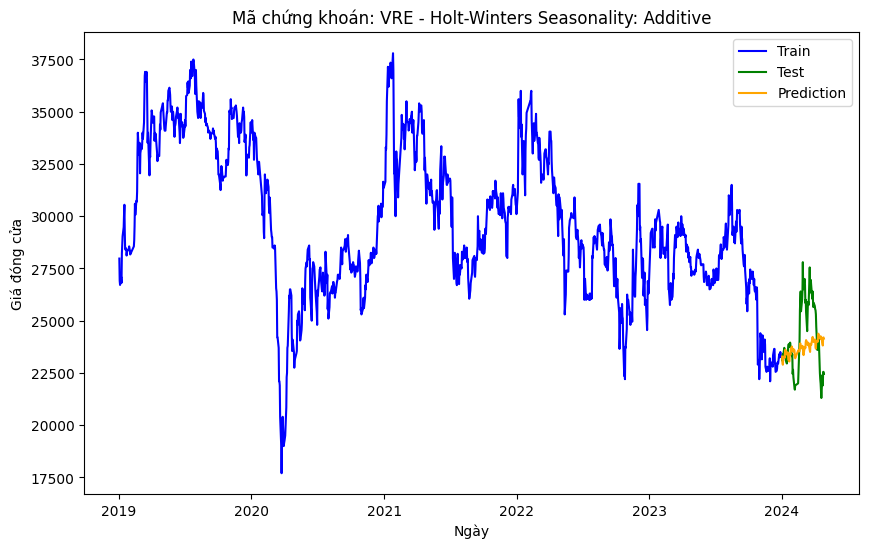

Đang xử lý mã chứng khoán (Cộng): BVH
Mã chứng khoán: BVH, MAE: 1668.5636963919435, RMSE: 1924.0756644381408, Seasonal: add


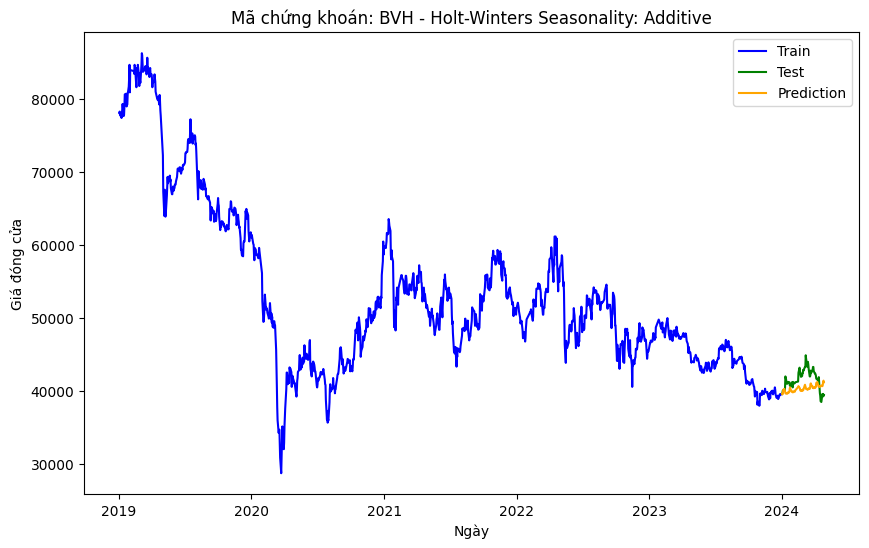

Đang xử lý mã chứng khoán (Cộng): POW
Mã chứng khoán: POW, MAE: 918.5084738912277, RMSE: 990.6197292522969, Seasonal: add


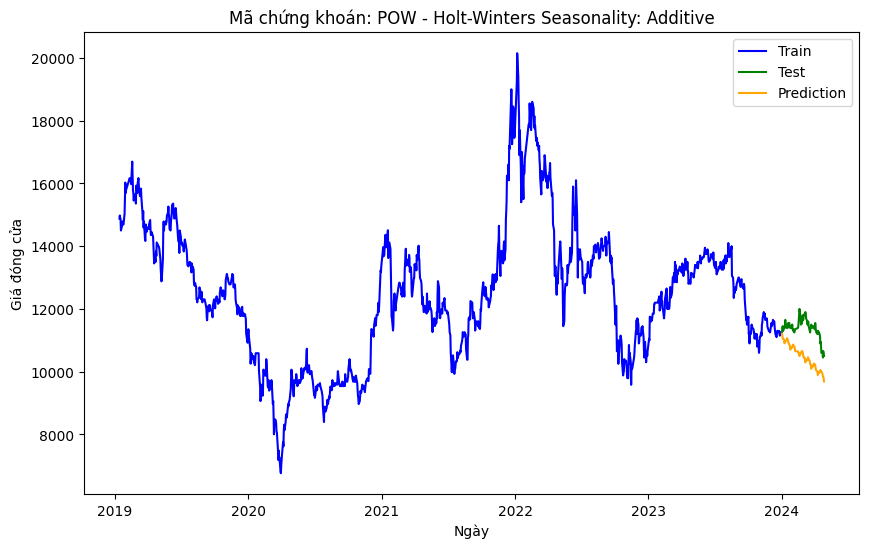

Đang xử lý mã chứng khoán (Cộng): GAS
Mã chứng khoán: GAS, MAE: 3420.8211299971504, RMSE: 4375.502933475087, Seasonal: add


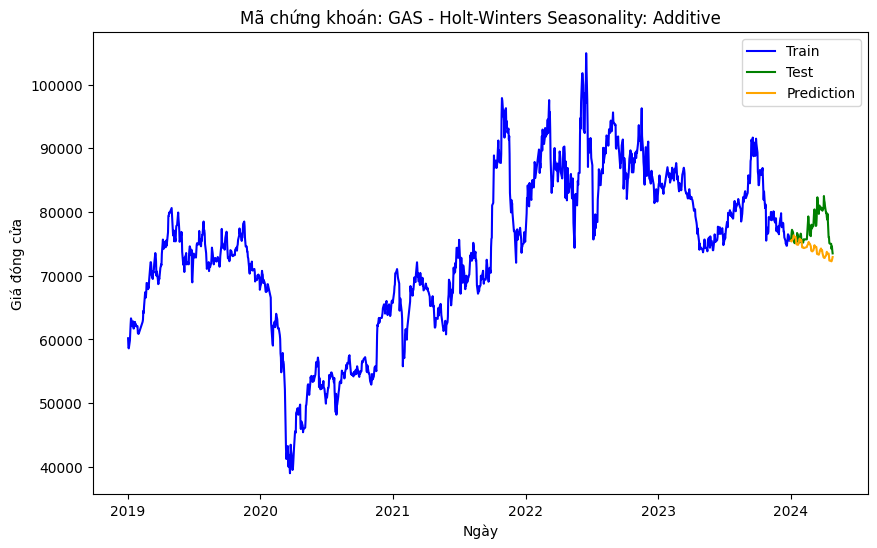

Đang xử lý mã chứng khoán (Cộng): ACB
Mã chứng khoán: ACB, MAE: 1431.9790073546635, RMSE: 1974.0356986624063, Seasonal: add


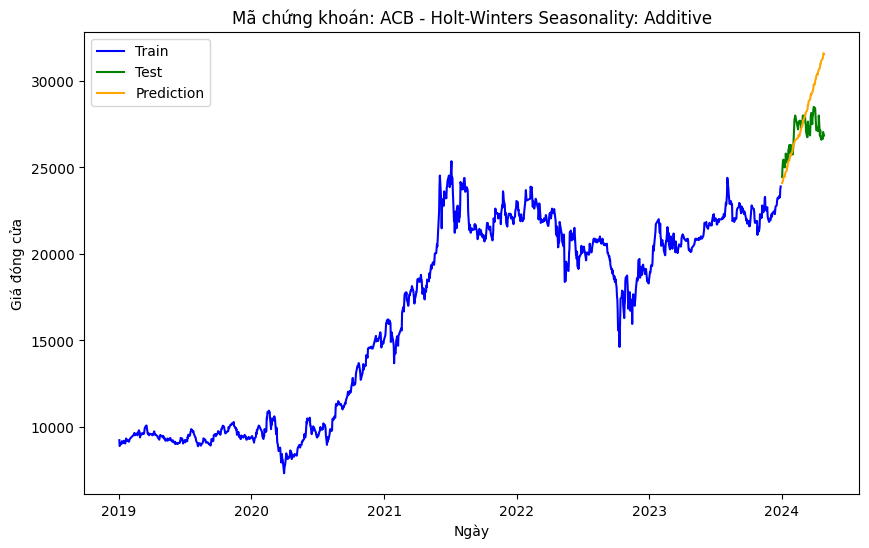

Đang xử lý mã chứng khoán (Cộng): BID
Mã chứng khoán: BID, MAE: 2347.546019593865, RMSE: 3209.56694813453, Seasonal: add


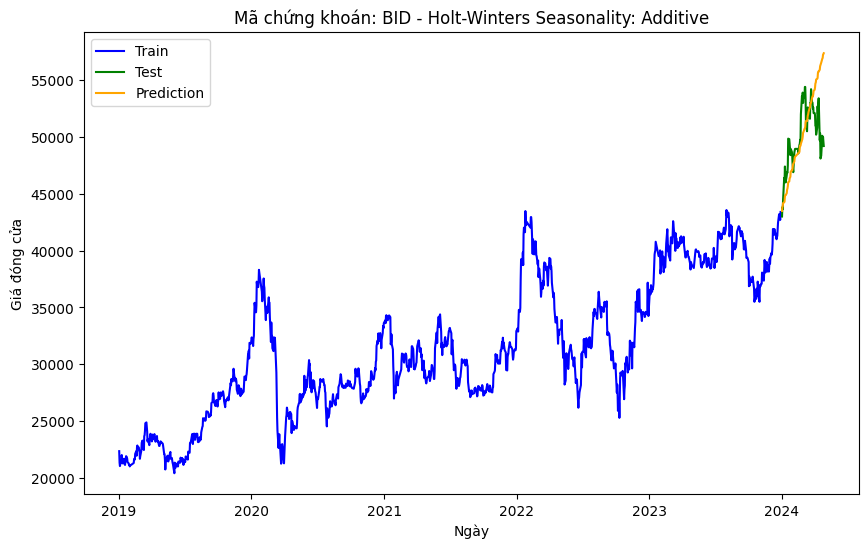

Đang xử lý mã chứng khoán (Cộng): CTG
Mã chứng khoán: CTG, MAE: 4209.412366408395, RMSE: 4577.143650969243, Seasonal: add


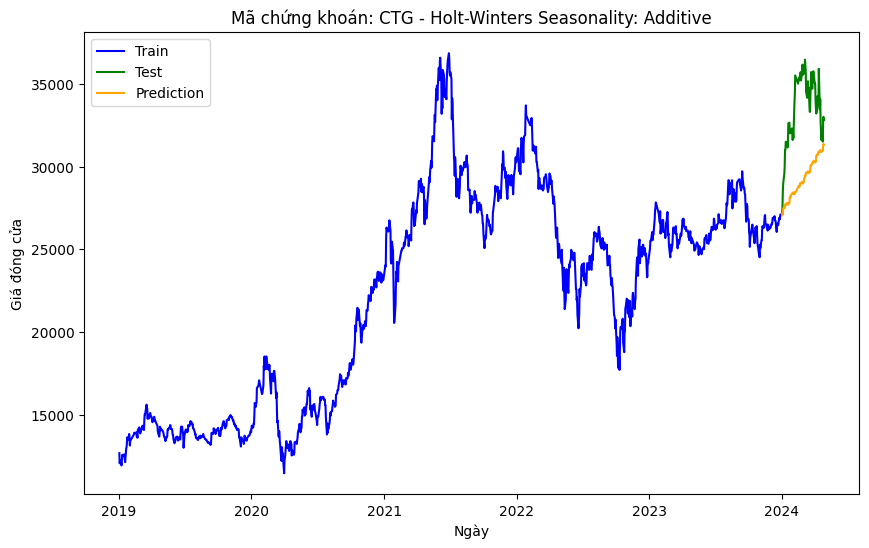

Đang xử lý mã chứng khoán (Cộng): HDB
Mã chứng khoán: HDB, MAE: 3356.537552299108, RMSE: 4140.184514560033, Seasonal: add


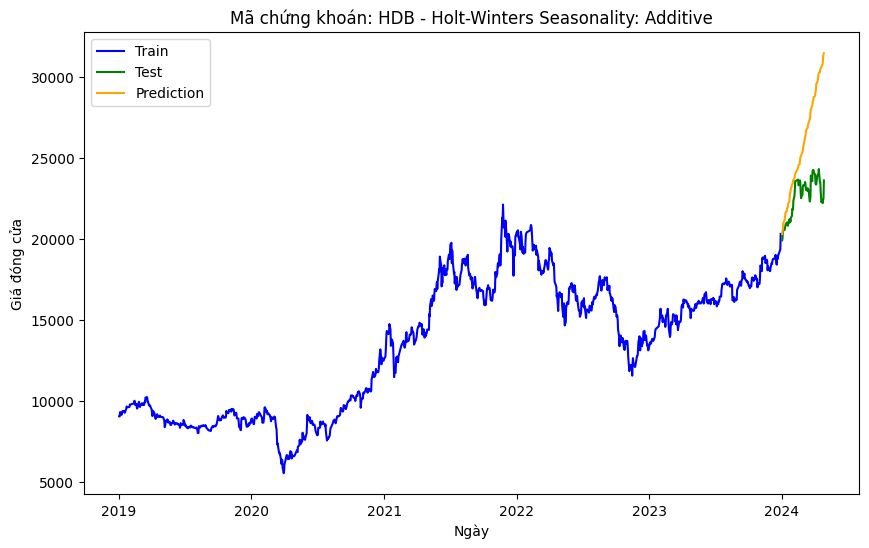

Đang xử lý mã chứng khoán (Cộng): MBB
Mã chứng khoán: MBB, MAE: 2414.911621546155, RMSE: 2636.2629397064456, Seasonal: add


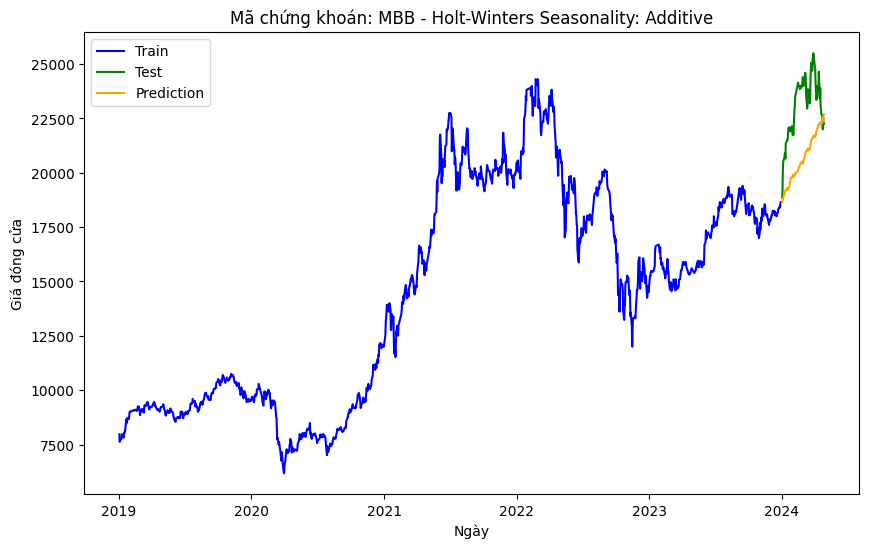

Đang xử lý mã chứng khoán (Cộng): SSB
Mã chứng khoán: SSB, MAE: 5422.063359453507, RMSE: 6148.227111616835, Seasonal: add


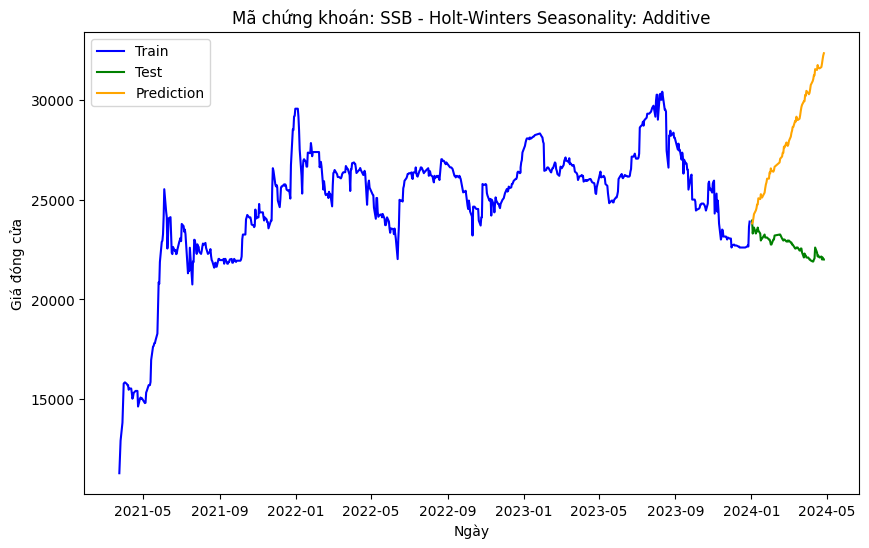

Đang xử lý mã chứng khoán (Cộng): SHB
Mã chứng khoán: SHB, MAE: 531.9668684565395, RMSE: 644.440753154988, Seasonal: add


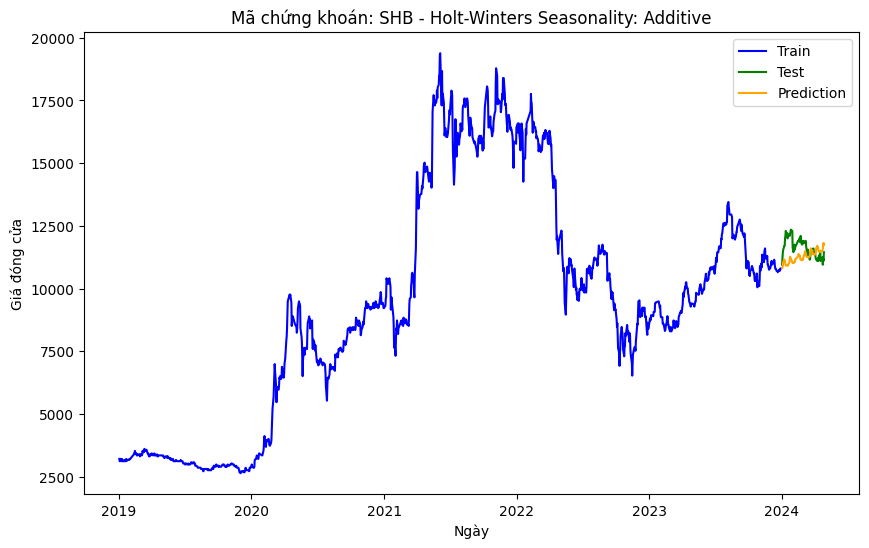

Đang xử lý mã chứng khoán (Cộng): STB
Mã chứng khoán: STB, MAE: 1534.5039149321838, RMSE: 1792.0883774699719, Seasonal: add


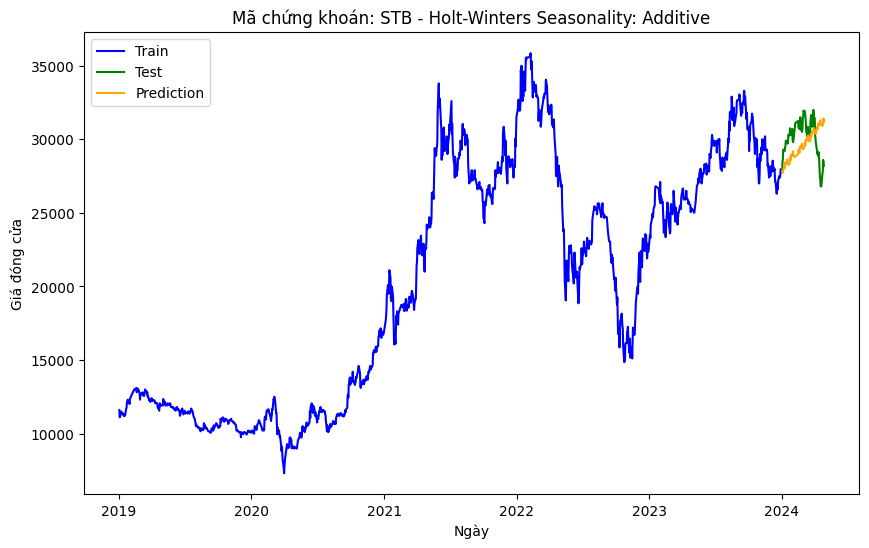

Đang xử lý mã chứng khoán (Cộng): TCB
Mã chứng khoán: TCB, MAE: 3184.86280674149, RMSE: 3831.730397078205, Seasonal: add


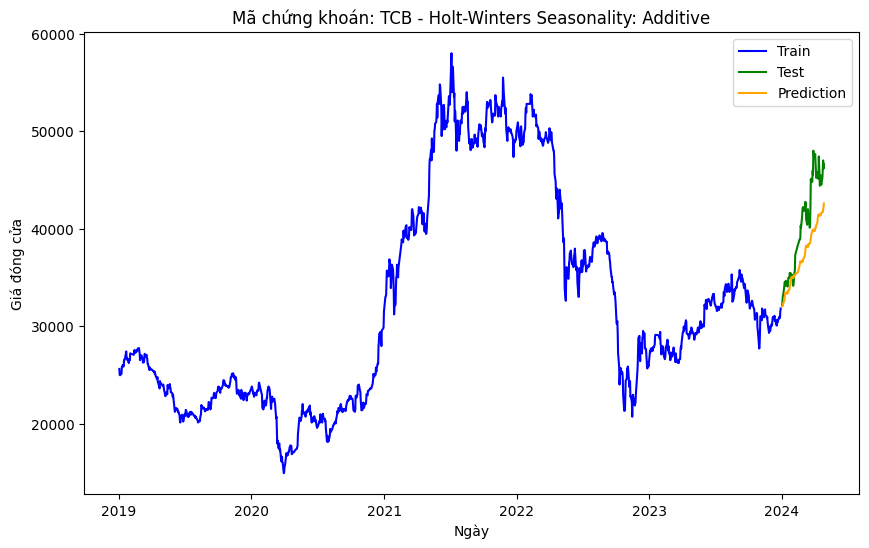

Đang xử lý mã chứng khoán (Cộng): TPB
Mã chứng khoán: TPB, MAE: 975.5422330105049, RMSE: 1350.5912437699192, Seasonal: add


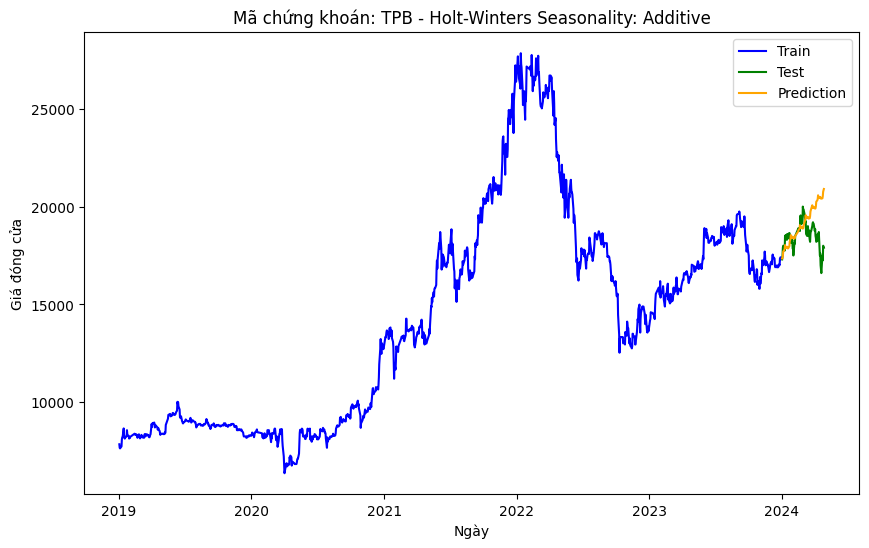

Đang xử lý mã chứng khoán (Cộng): VCB
Mã chứng khoán: VCB, MAE: 20055.179754260218, RMSE: 21317.13176316793, Seasonal: add


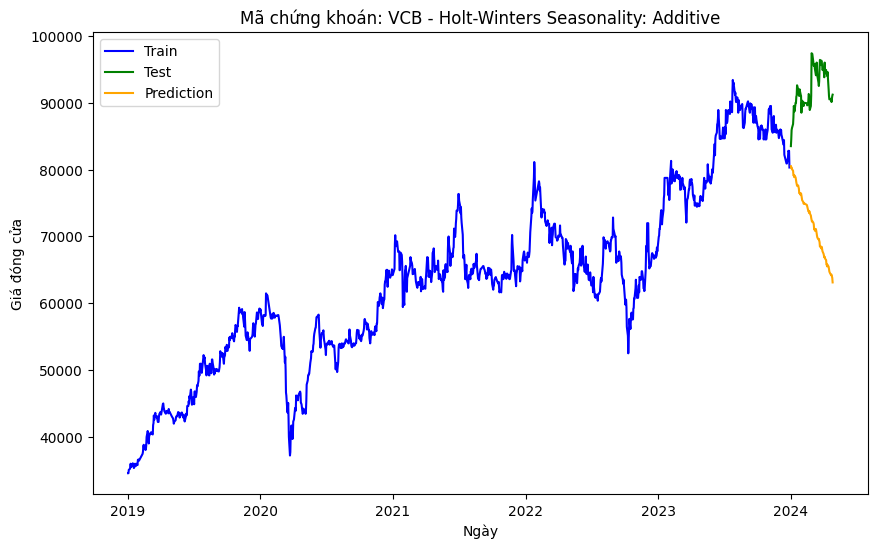

Đang xử lý mã chứng khoán (Cộng): VIB
Mã chứng khoán: VIB, MAE: 808.5316102396711, RMSE: 1042.0040795653265, Seasonal: add


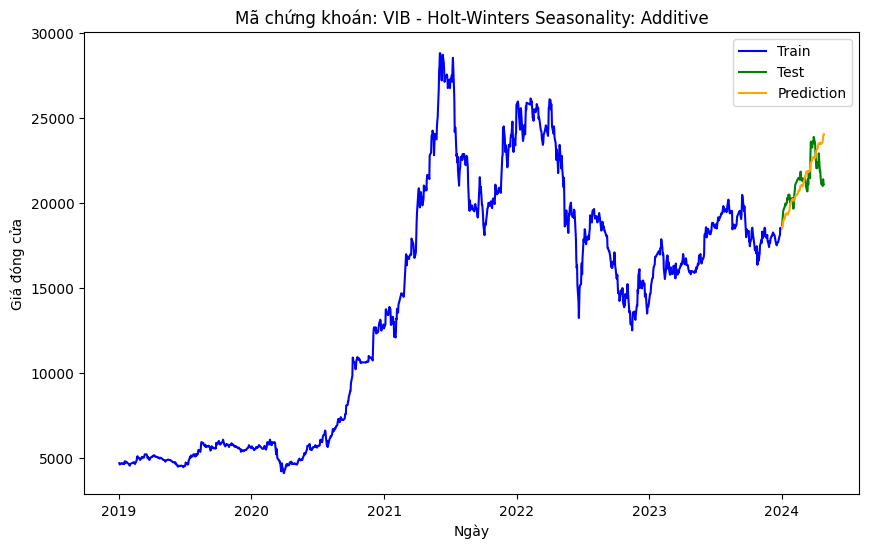

Đang xử lý mã chứng khoán (Cộng): VPB
Mã chứng khoán: VPB, MAE: 2092.532501100929, RMSE: 2547.1021986155006, Seasonal: add


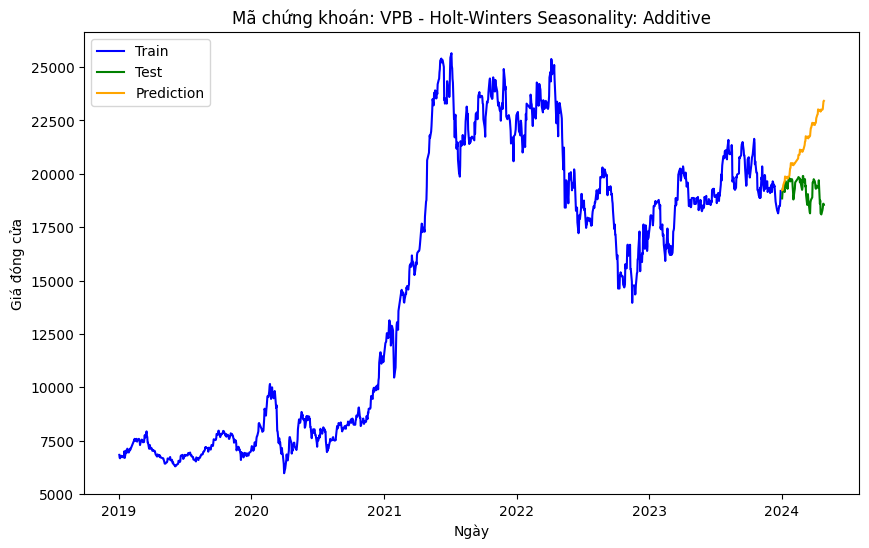

Đang xử lý mã chứng khoán (Cộng): HPG
Mã chứng khoán: HPG, MAE: 2371.522611646152, RMSE: 2885.7854291453255, Seasonal: add


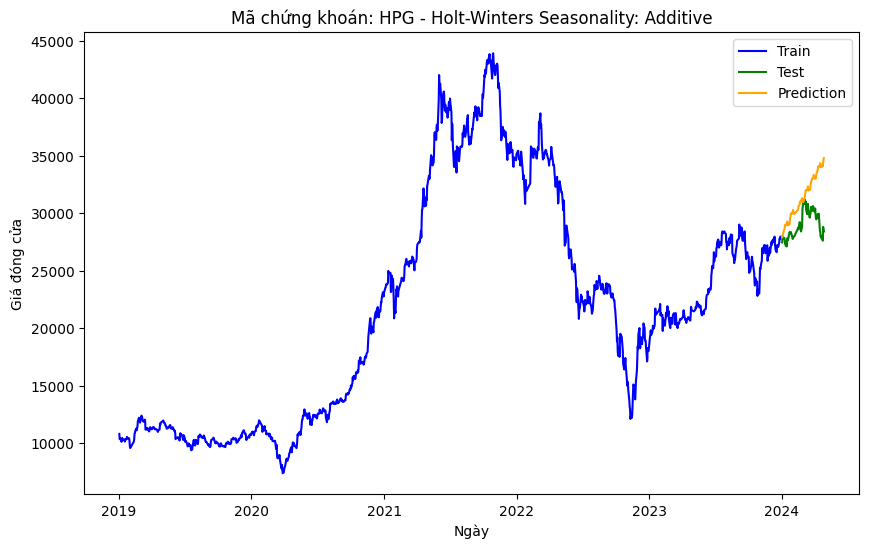

Đang xử lý mã chứng khoán (Cộng): GVR
Mã chứng khoán: GVR, MAE: 3195.3107814200207, RMSE: 3999.8110481304607, Seasonal: add


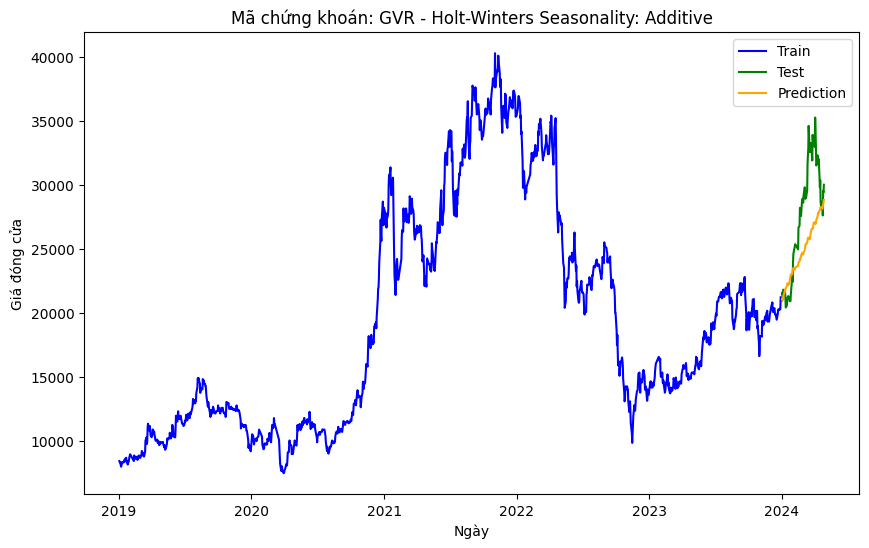

Đang xử lý mã chứng khoán (Cộng): MSN
Mã chứng khoán: MSN, MAE: 6702.414126915448, RMSE: 8449.758128689085, Seasonal: add


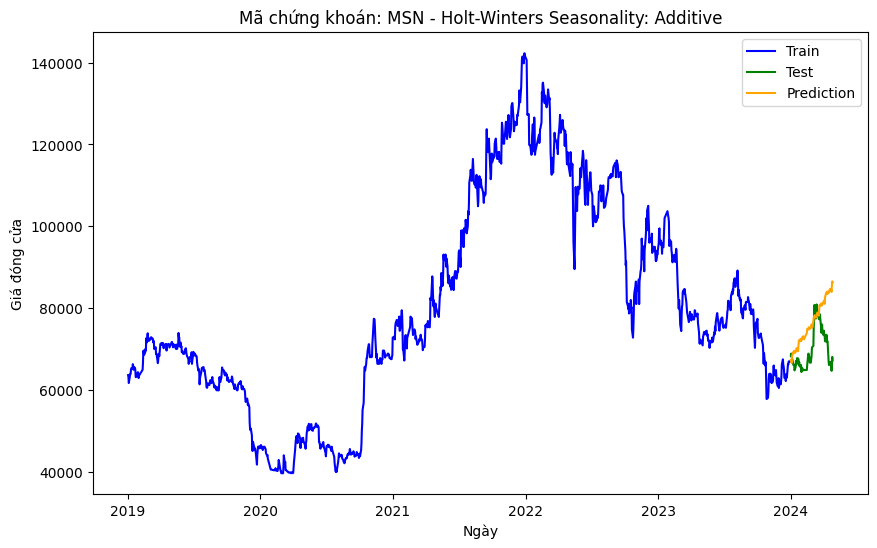

Đang xử lý mã chứng khoán (Cộng): VNM
Mã chứng khoán: VNM, MAE: 1734.5627878185176, RMSE: 2260.112062093411, Seasonal: add


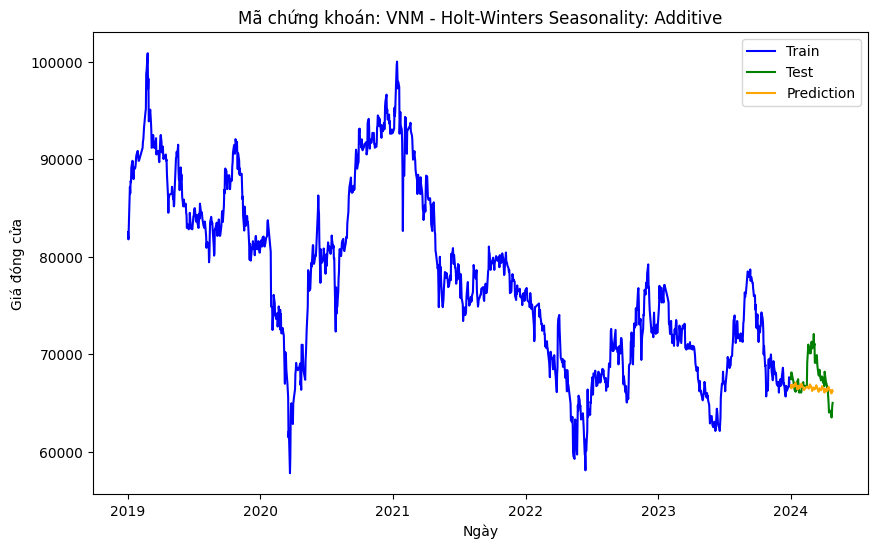

Đang xử lý mã chứng khoán (Cộng): SAB
Mã chứng khoán: SAB, MAE: 4962.270327908254, RMSE: 5709.8128662591, Seasonal: add


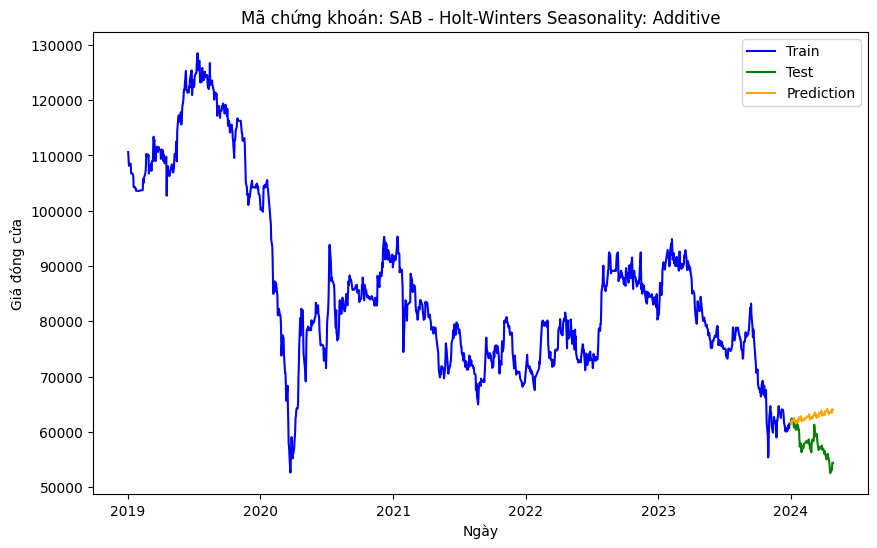

Đang xử lý mã chứng khoán (Cộng): VJC
Mã chứng khoán: VJC, MAE: 14133.176952313264, RMSE: 15650.508721269394, Seasonal: add


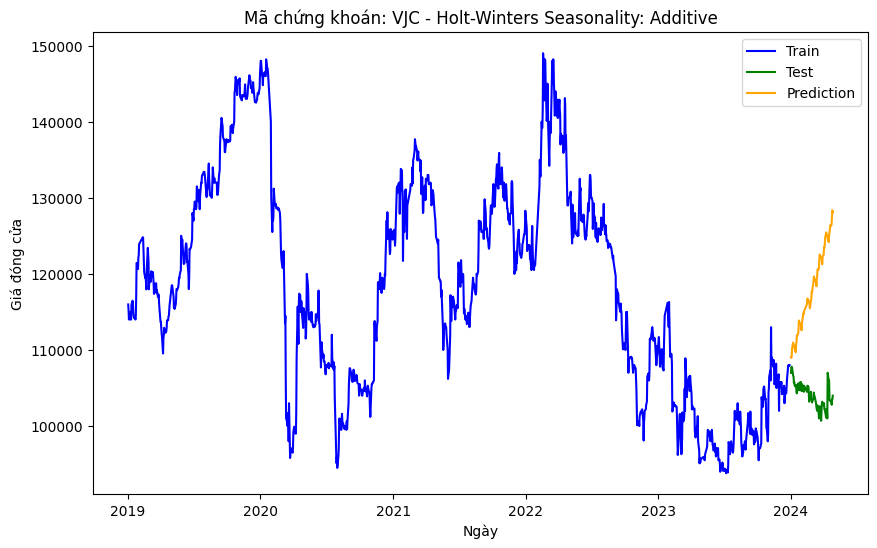

Đang xử lý mã chứng khoán (Cộng): MWG
Mã chứng khoán: MWG, MAE: 1194.8348940377311, RMSE: 1426.0863445768955, Seasonal: add


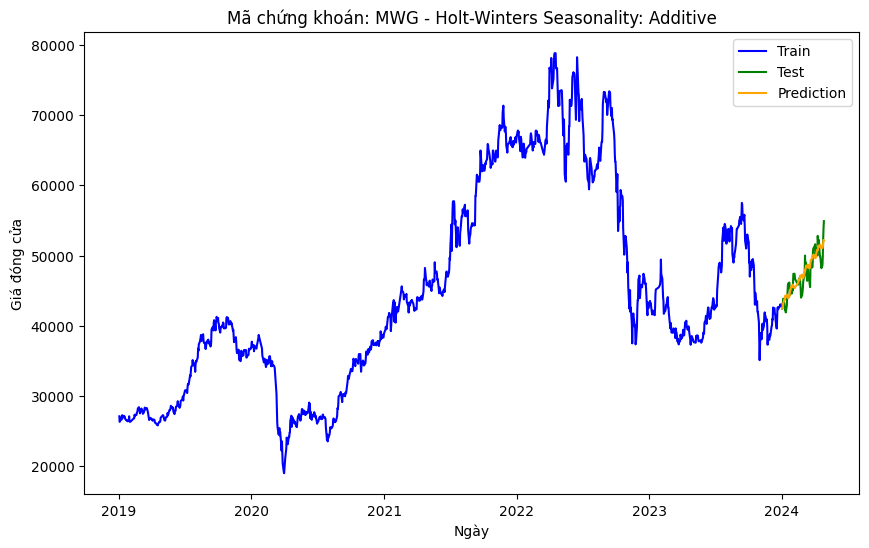

Đang xử lý mã chứng khoán (Cộng): PLX
Mã chứng khoán: PLX, MAE: 1045.3009119890428, RMSE: 1400.2425906772926, Seasonal: add


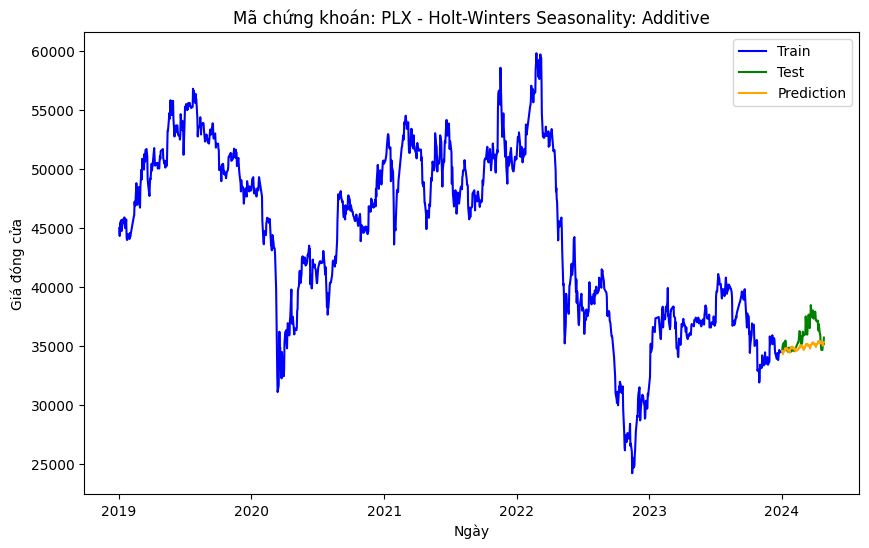

Đang xử lý mã chứng khoán (Cộng): FPT
Mã chứng khoán: FPT, MAE: 7181.885735759568, RMSE: 8535.214815499923, Seasonal: add


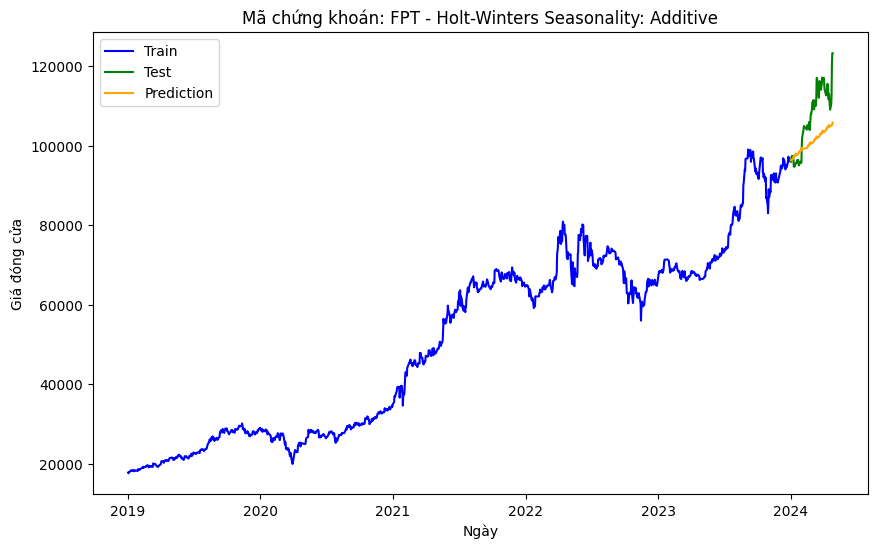

MAE Trung bình (Additive): 3697.0794154712034, RMSE Trung bình (Additive): 4349.503201118644


In [19]:

# Xử lý Holt-Winters Additive
for ticker in tickers:
    print(f"Đang xử lý mã chứng khoán (Cộng): {ticker}")

    train_df_ticker = evaluator_holt_winters.prepare_data(train_df, ticker)
    test_df_ticker = evaluator_holt_winters.prepare_data(test_df, ticker)

    forecast_additive, mae_additive, rmse_additive = evaluator_holt_winters.fit_and_predict_holt_winters(
        train_df_ticker, test_df_ticker, ticker, seasonal_mode='add'
    )
    evaluator_holt_winters.plot_forecast_holt_winters(train_df_ticker, forecast_additive, test_df_ticker, ticker, 'Additive')

# Tính toán trung bình cho Additive
results_df_additive, _ = evaluator_holt_winters.get_results()
average_mae_add, average_rmse_add = evaluator_holt_winters.calculate_average_metrics(results_df_additive)
print(f"MAE Trung bình (Additive): {average_mae_add}, RMSE Trung bình (Additive): {average_rmse_add}")

# Lưu kết quả Additive vào CSV
evaluator_holt_winters.save_results_to_csv(results_df_additive, "holt_winters_additive_results.csv")


Đang xử lý mã chứng khoán (Nhân): SSI
Mã chứng khoán: SSI, MAE: 1189.9302056187114, RMSE: 1486.5536488855623, Seasonal: mul


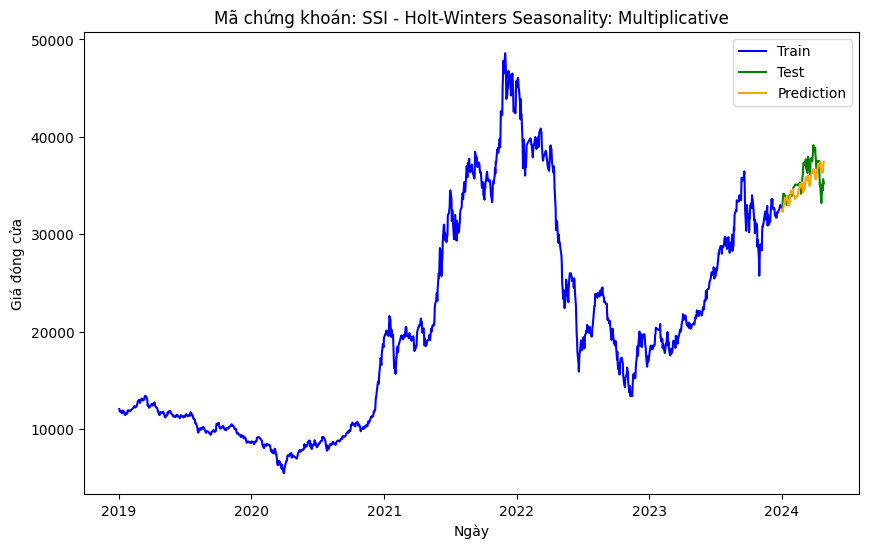

Đang xử lý mã chứng khoán (Nhân): BCM
Mã chứng khoán: BCM, MAE: 3006.5751449330637, RMSE: 4222.696962463945, Seasonal: mul


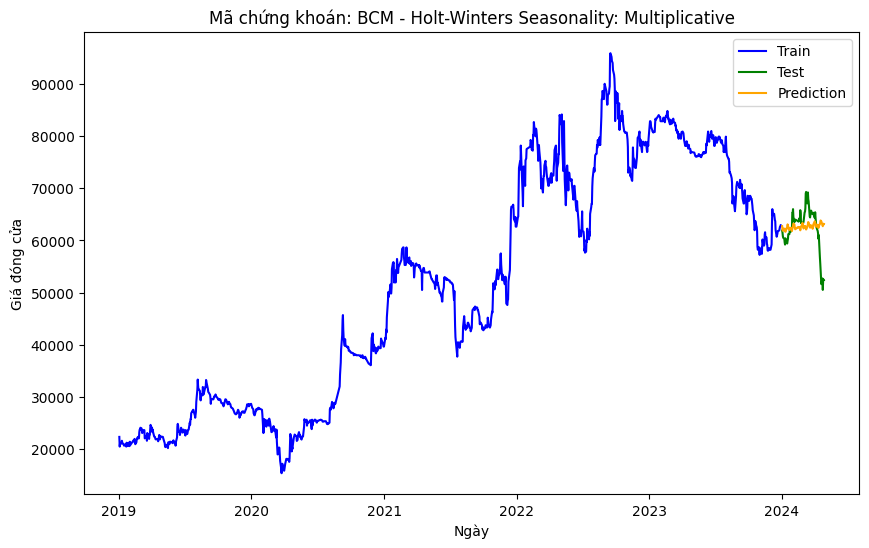

Đang xử lý mã chứng khoán (Nhân): VHM
Mã chứng khoán: VHM, MAE: 8582.28870553595, RMSE: 9888.818707709646, Seasonal: mul


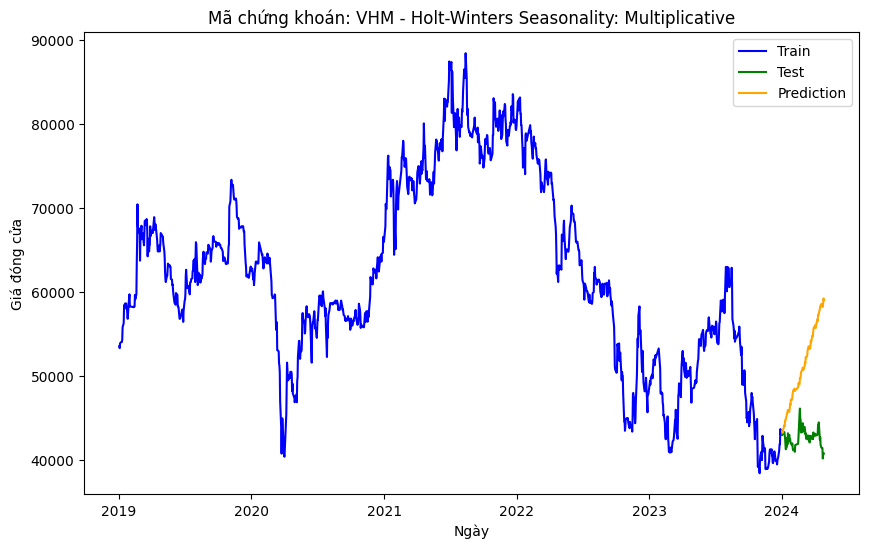

Đang xử lý mã chứng khoán (Nhân): VIC
Mã chứng khoán: VIC, MAE: 1572.0434632023187, RMSE: 1990.562242440921, Seasonal: mul


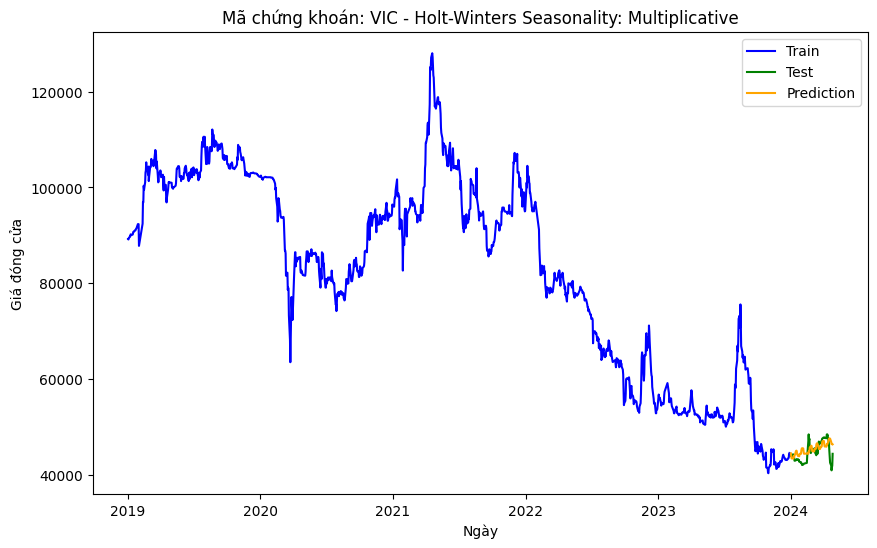

Đang xử lý mã chứng khoán (Nhân): VRE
Mã chứng khoán: VRE, MAE: 1366.3244418464321, RMSE: 1677.3384819872308, Seasonal: mul


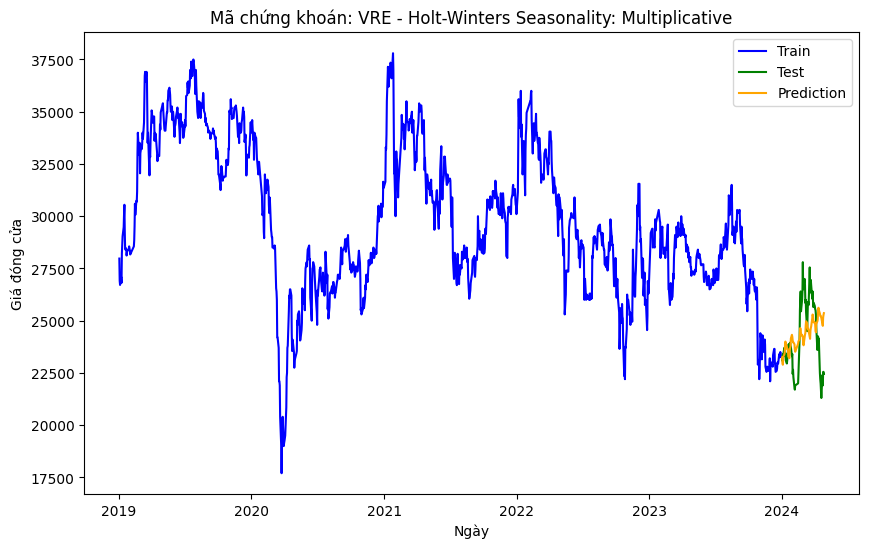

Đang xử lý mã chứng khoán (Nhân): BVH
Mã chứng khoán: BVH, MAE: 1889.6270695417188, RMSE: 2179.4765557637056, Seasonal: mul


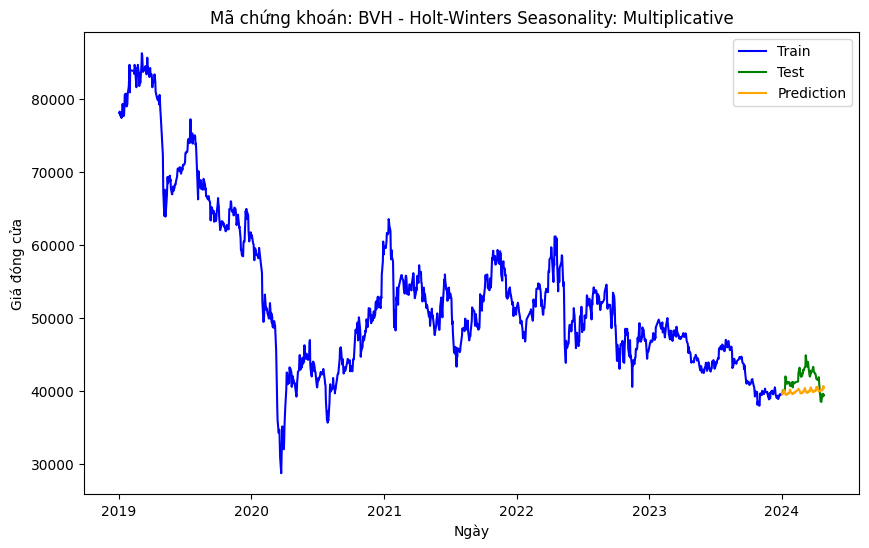

Đang xử lý mã chứng khoán (Nhân): POW
Mã chứng khoán: POW, MAE: 739.3527595838711, RMSE: 807.3320843008883, Seasonal: mul


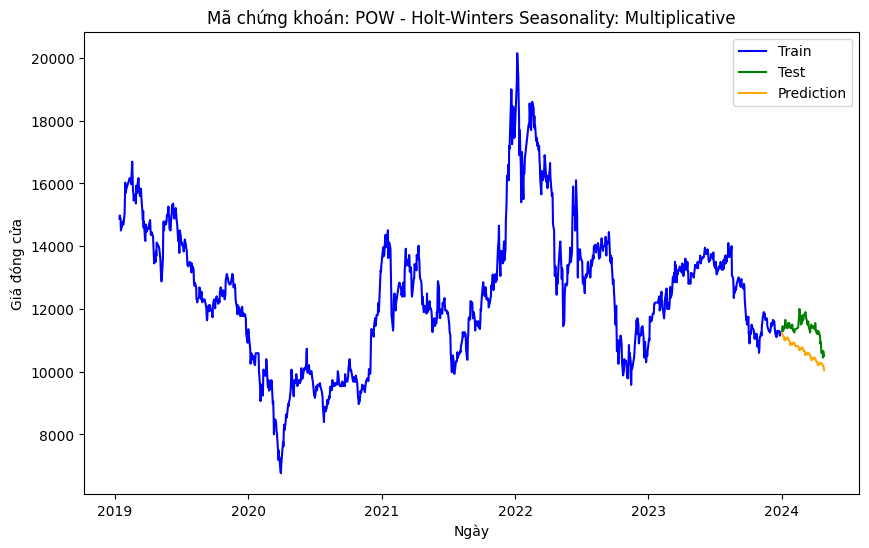

Đang xử lý mã chứng khoán (Nhân): GAS
Mã chứng khoán: GAS, MAE: 3951.071220738532, RMSE: 4933.399663436107, Seasonal: mul


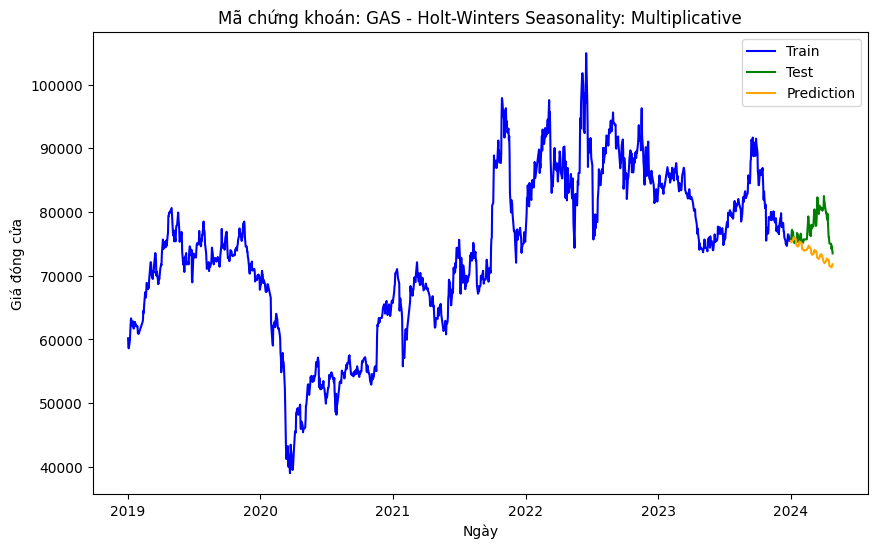

Đang xử lý mã chứng khoán (Nhân): ACB
Mã chứng khoán: ACB, MAE: 1256.39775791128, RMSE: 1635.5472636872635, Seasonal: mul


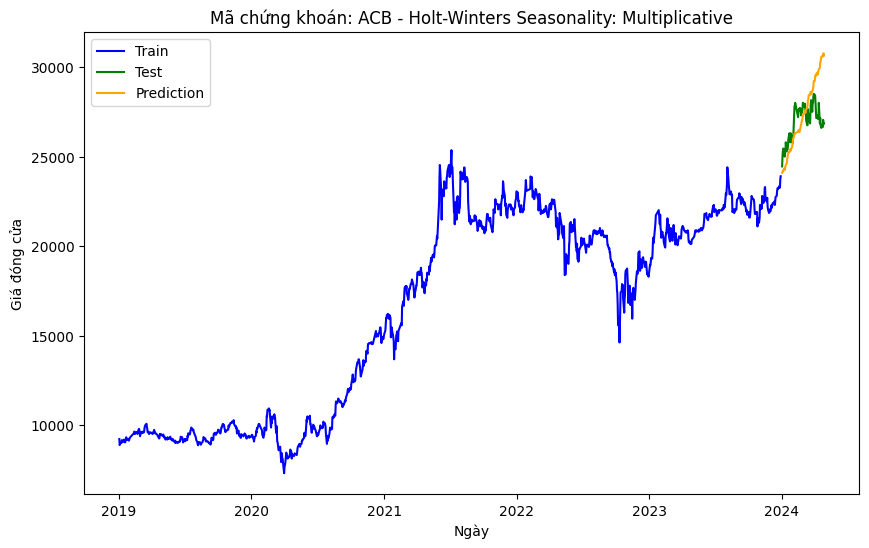

Đang xử lý mã chứng khoán (Nhân): BID
Mã chứng khoán: BID, MAE: 2342.3174931590656, RMSE: 3171.2986723903327, Seasonal: mul


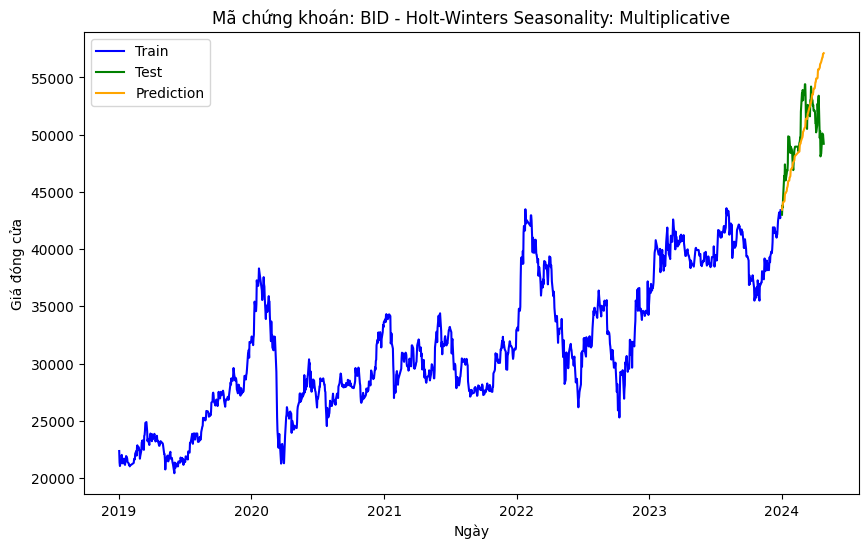

Đang xử lý mã chứng khoán (Nhân): CTG
Mã chứng khoán: CTG, MAE: 4198.519314393366, RMSE: 4565.519526351474, Seasonal: mul


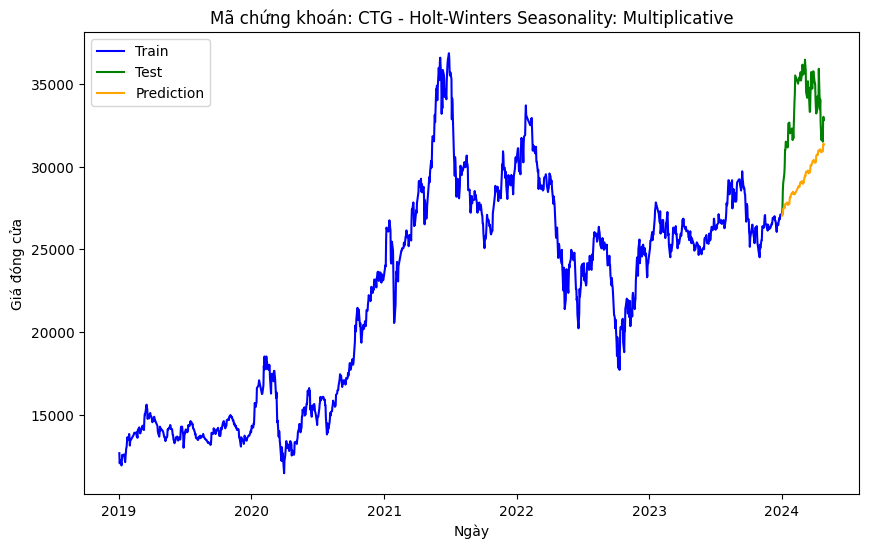

Đang xử lý mã chứng khoán (Nhân): HDB
Mã chứng khoán: HDB, MAE: 2803.498007110624, RMSE: 3551.590313445751, Seasonal: mul


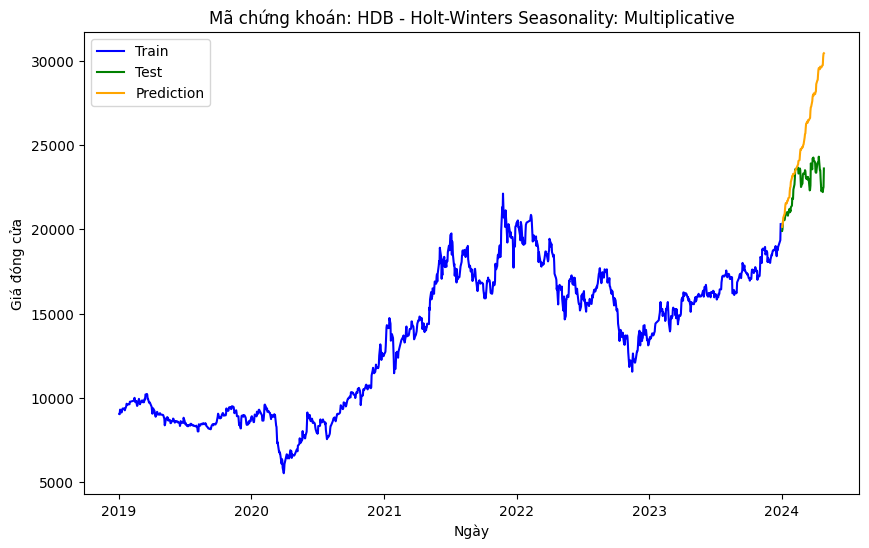

Đang xử lý mã chứng khoán (Nhân): MBB
Mã chứng khoán: MBB, MAE: 2401.1332714488726, RMSE: 2621.6480869218653, Seasonal: mul


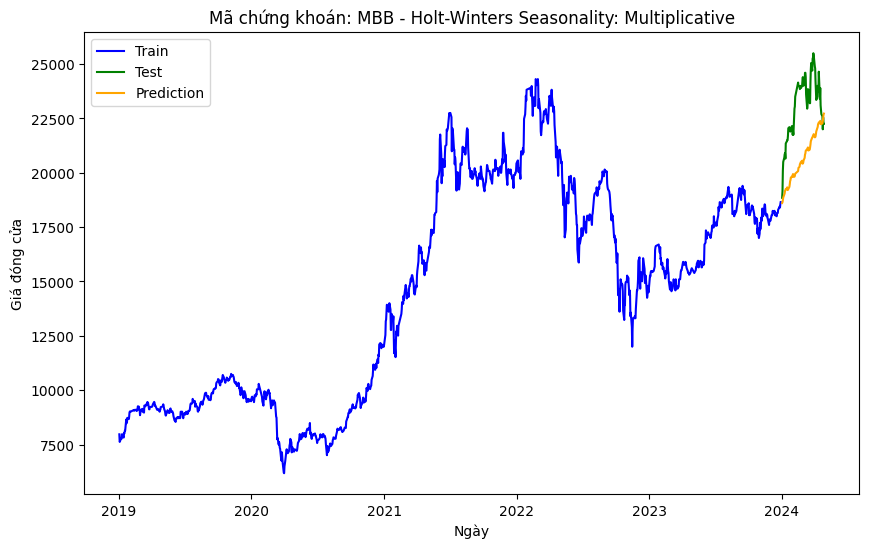

Đang xử lý mã chứng khoán (Nhân): SSB
Mã chứng khoán: SSB, MAE: 5870.623574498605, RMSE: 6635.726207415498, Seasonal: mul


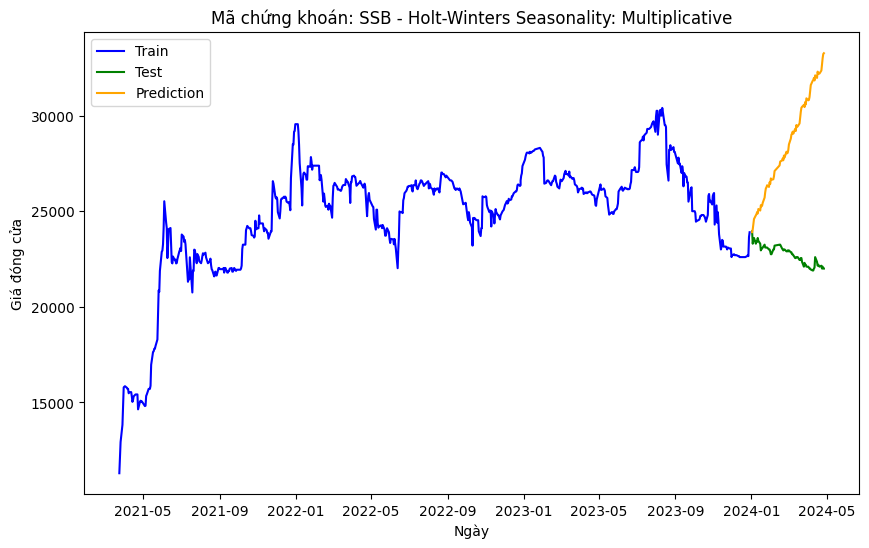

Đang xử lý mã chứng khoán (Nhân): SHB
Mã chứng khoán: SHB, MAE: 541.7679940756476, RMSE: 657.5134152676402, Seasonal: mul


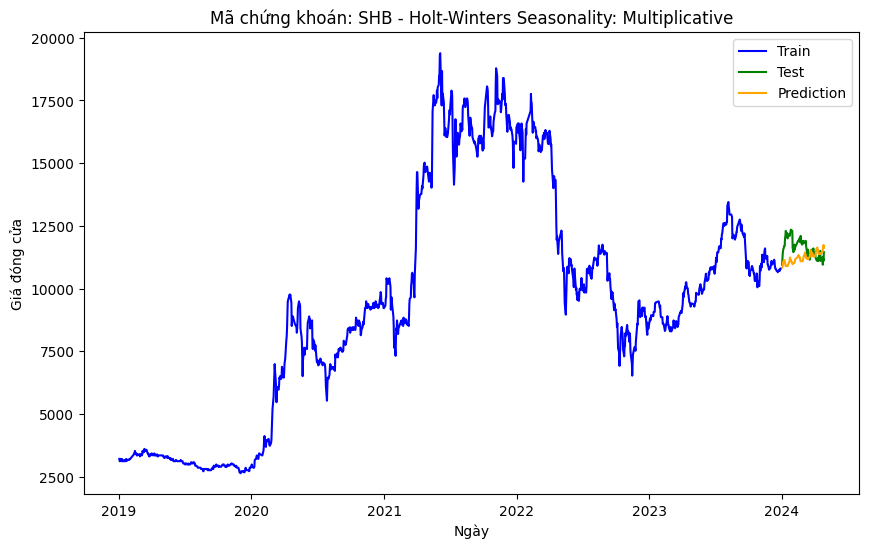

Đang xử lý mã chứng khoán (Nhân): STB
Mã chứng khoán: STB, MAE: 1468.0313738580783, RMSE: 2023.1203637209762, Seasonal: mul


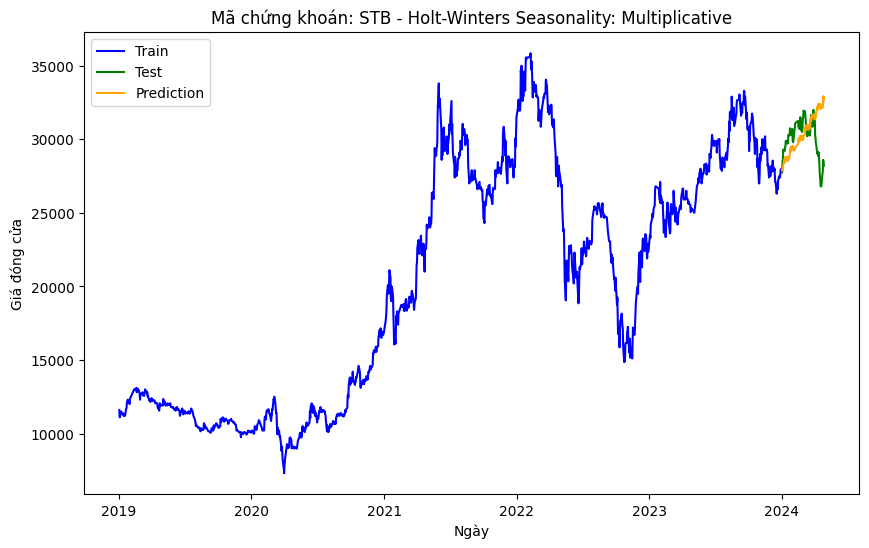

Đang xử lý mã chứng khoán (Nhân): TCB
Mã chứng khoán: TCB, MAE: 2338.2912689681366, RMSE: 2924.451481529287, Seasonal: mul


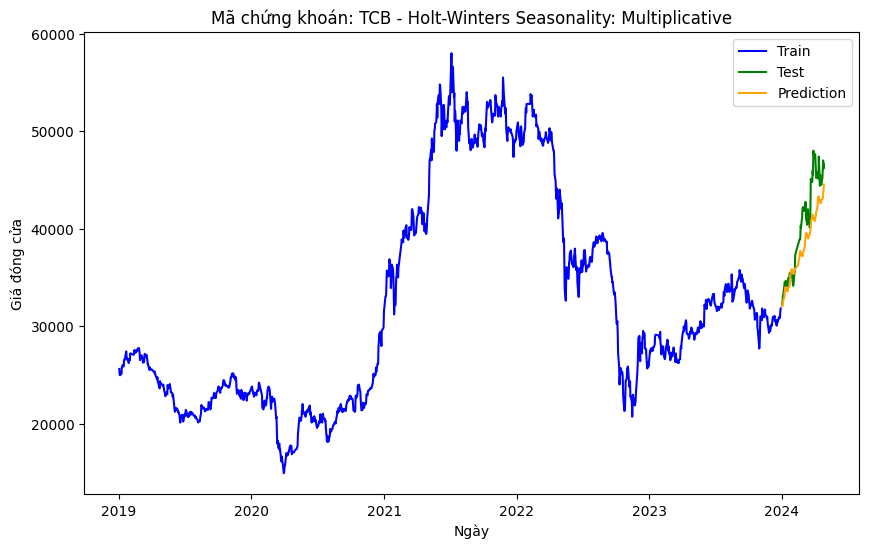

Đang xử lý mã chứng khoán (Nhân): TPB
Mã chứng khoán: TPB, MAE: 1102.8298347449715, RMSE: 1522.559585483117, Seasonal: mul


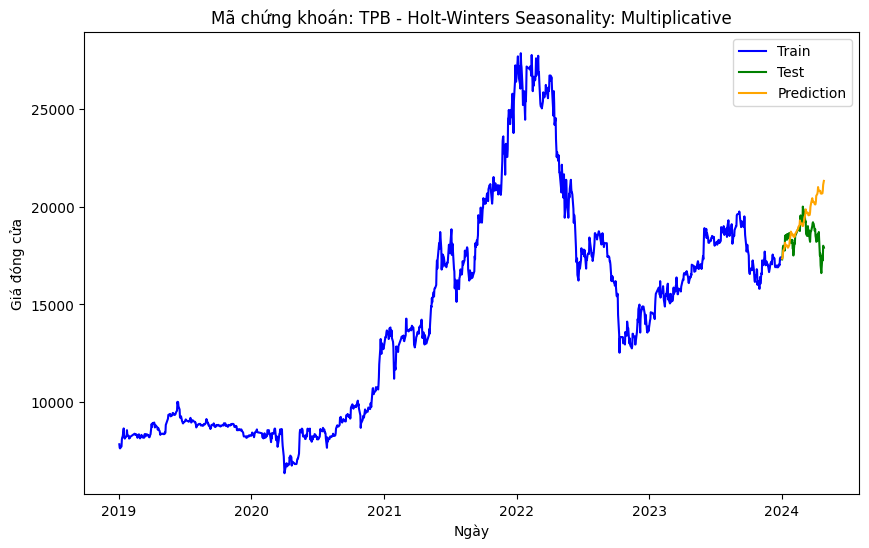

Đang xử lý mã chứng khoán (Nhân): VCB
Mã chứng khoán: VCB, MAE: 20494.99506042782, RMSE: 21785.509847474976, Seasonal: mul


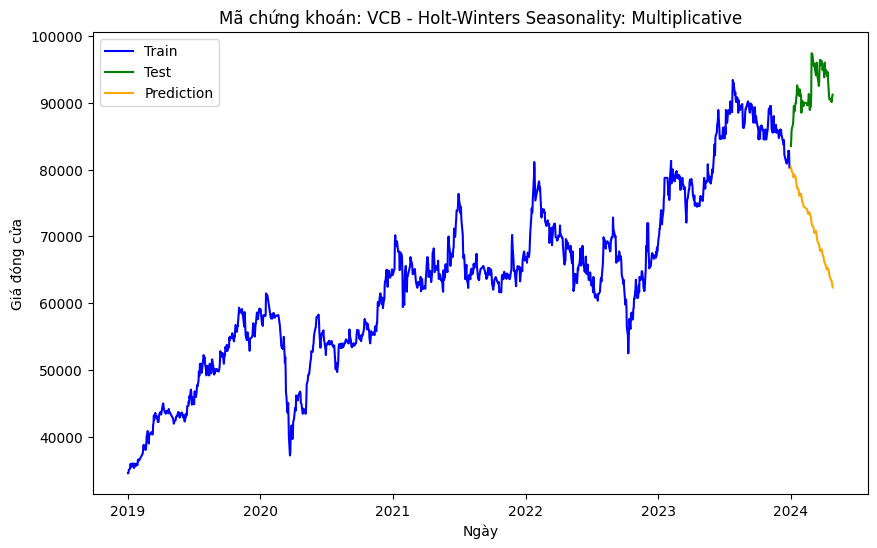

Đang xử lý mã chứng khoán (Nhân): VIB
Mã chứng khoán: VIB, MAE: 801.2604517257538, RMSE: 1014.4386438332642, Seasonal: mul


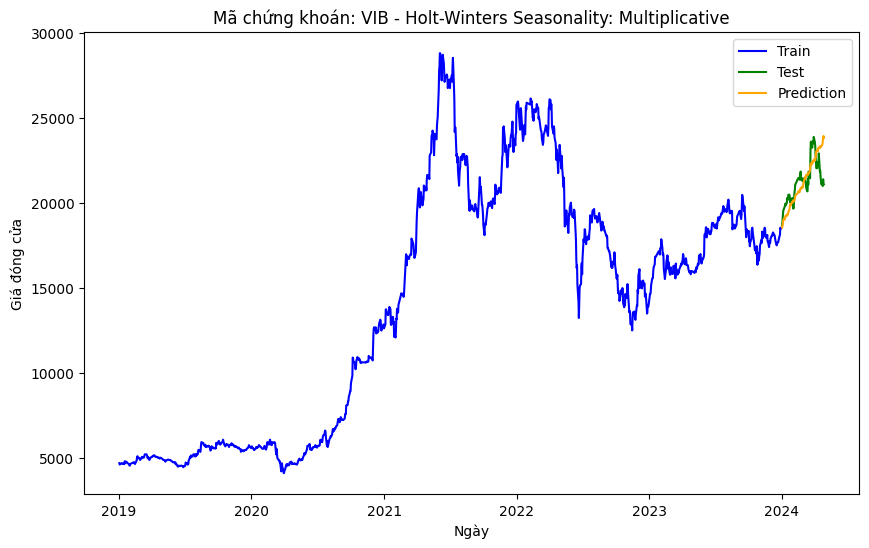

Đang xử lý mã chứng khoán (Nhân): VPB
Mã chứng khoán: VPB, MAE: 2292.731347929808, RMSE: 2768.2478070178927, Seasonal: mul


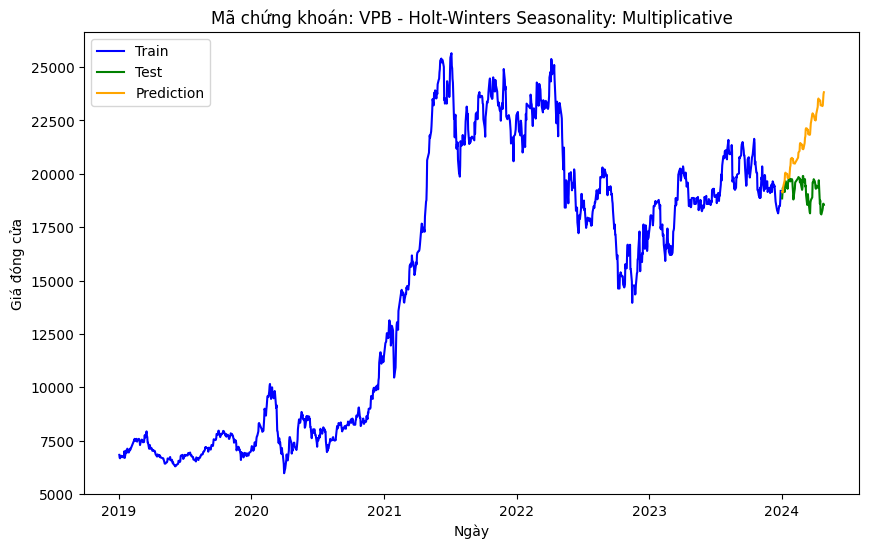

Đang xử lý mã chứng khoán (Nhân): HPG
Mã chứng khoán: HPG, MAE: 2663.2679888886732, RMSE: 3182.2032676396198, Seasonal: mul


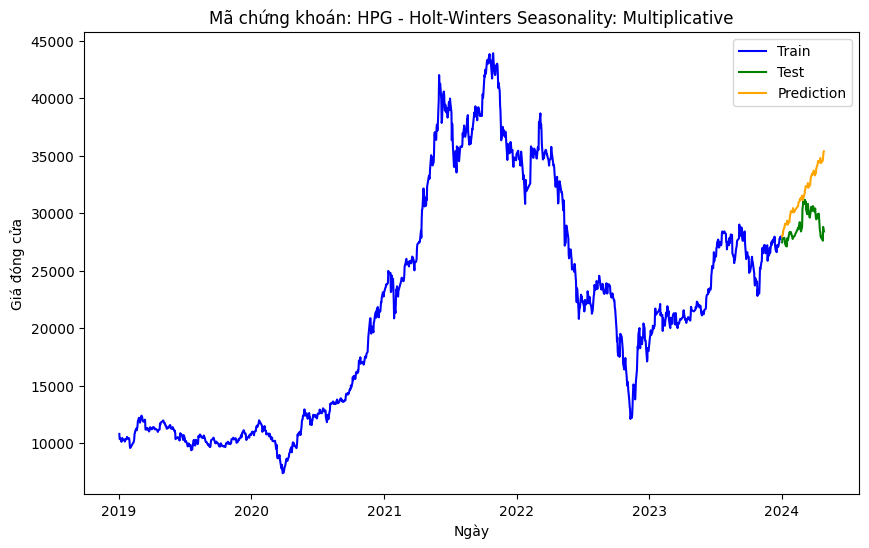

Đang xử lý mã chứng khoán (Nhân): GVR
Mã chứng khoán: GVR, MAE: 2997.845085141787, RMSE: 3757.342138829264, Seasonal: mul


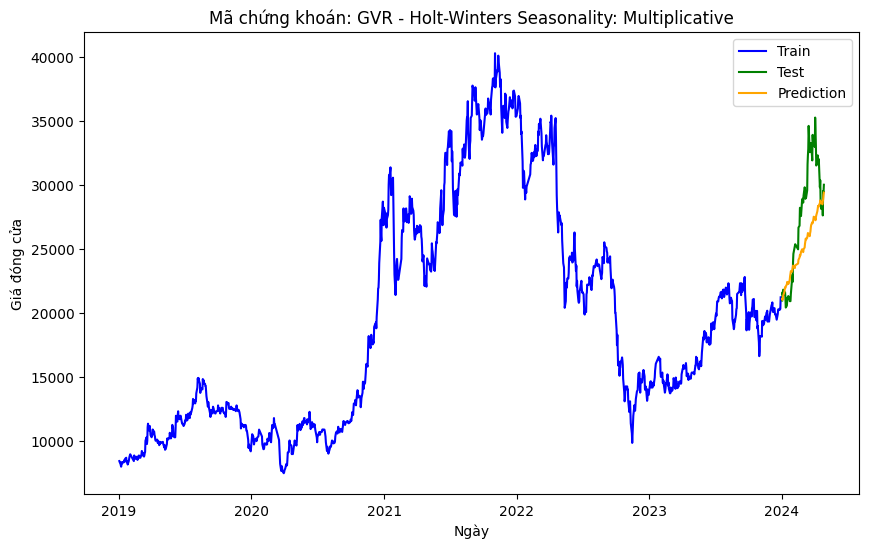

Đang xử lý mã chứng khoán (Nhân): MSN
Mã chứng khoán: MSN, MAE: 6728.624948724509, RMSE: 8479.561432984812, Seasonal: mul


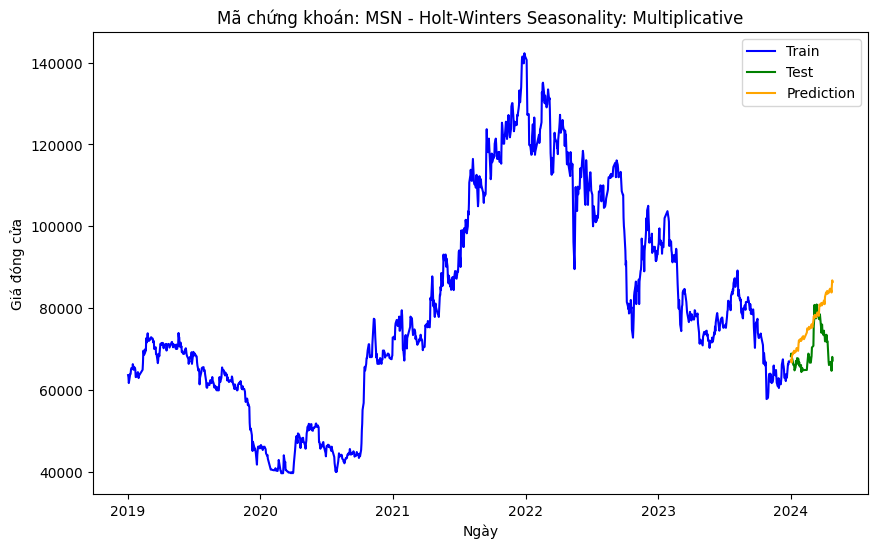

Đang xử lý mã chứng khoán (Nhân): VNM
Mã chứng khoán: VNM, MAE: 1570.4004491368319, RMSE: 2092.930529698409, Seasonal: mul


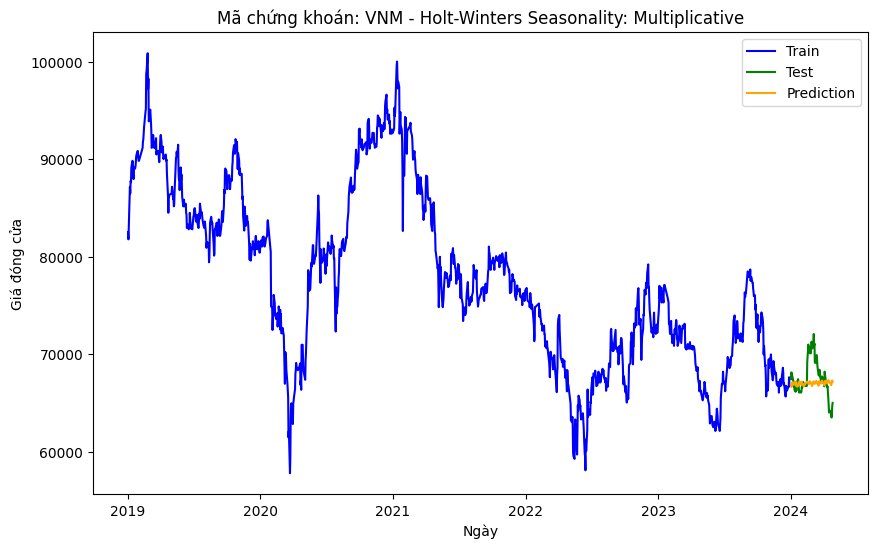

Đang xử lý mã chứng khoán (Nhân): SAB
Mã chứng khoán: SAB, MAE: 5158.901294584995, RMSE: 5924.432304968153, Seasonal: mul


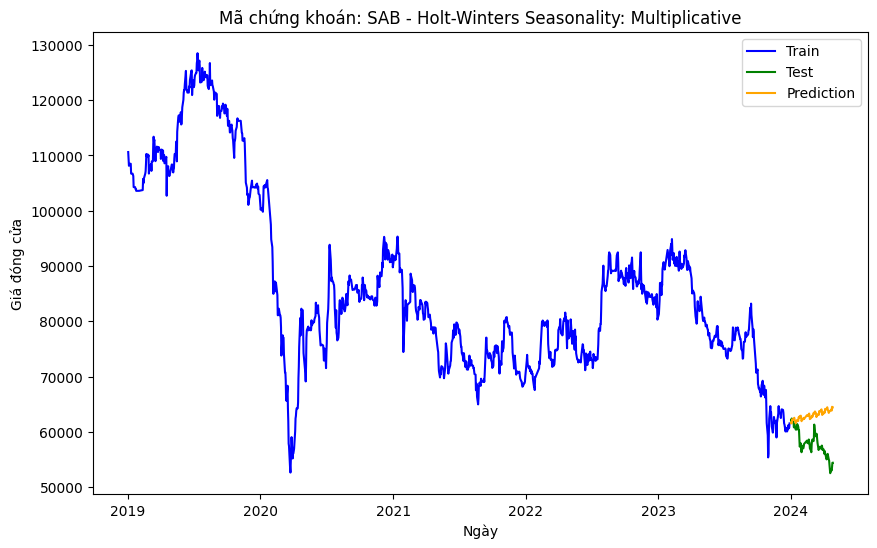

Đang xử lý mã chứng khoán (Nhân): VJC
Mã chứng khoán: VJC, MAE: 14852.844627226485, RMSE: 16446.025122599534, Seasonal: mul


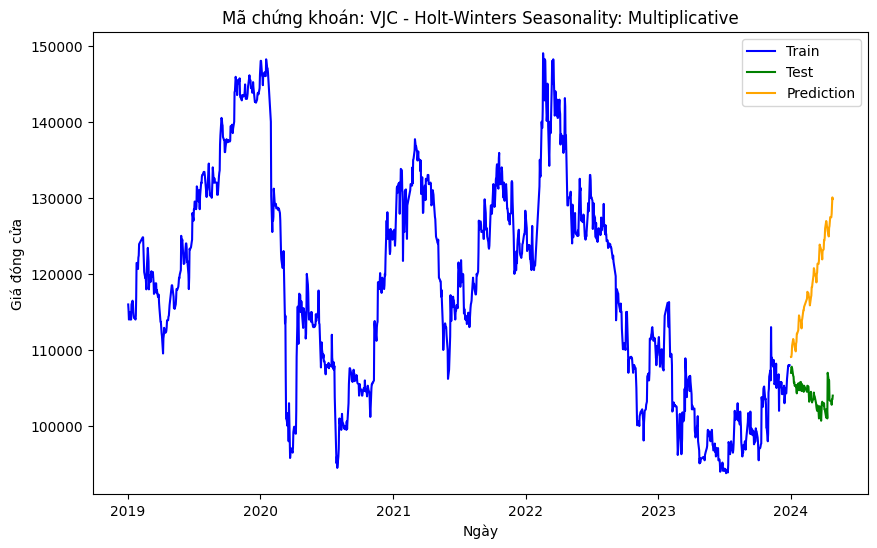

Đang xử lý mã chứng khoán (Nhân): MWG
Mã chứng khoán: MWG, MAE: 1804.2668105812747, RMSE: 2188.278927412043, Seasonal: mul


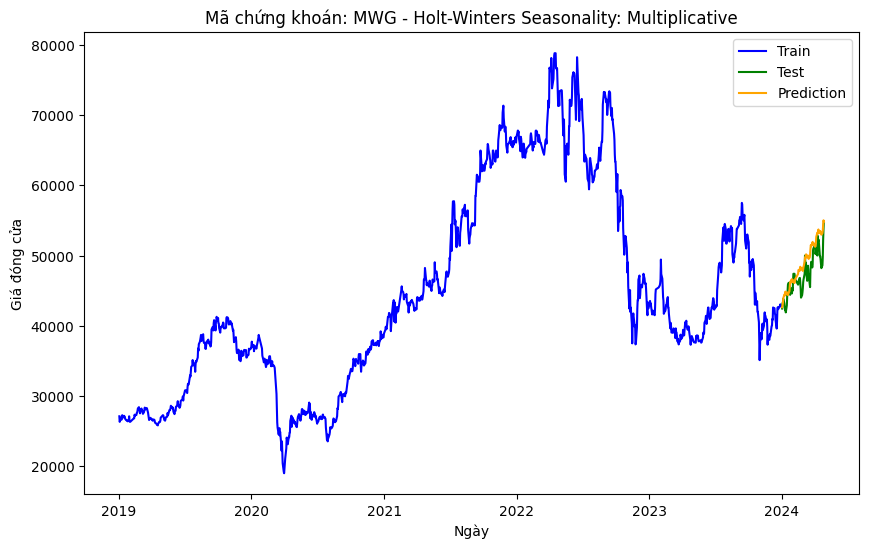

Đang xử lý mã chứng khoán (Nhân): PLX
Mã chứng khoán: PLX, MAE: 899.9427438225853, RMSE: 1190.5140873631278, Seasonal: mul


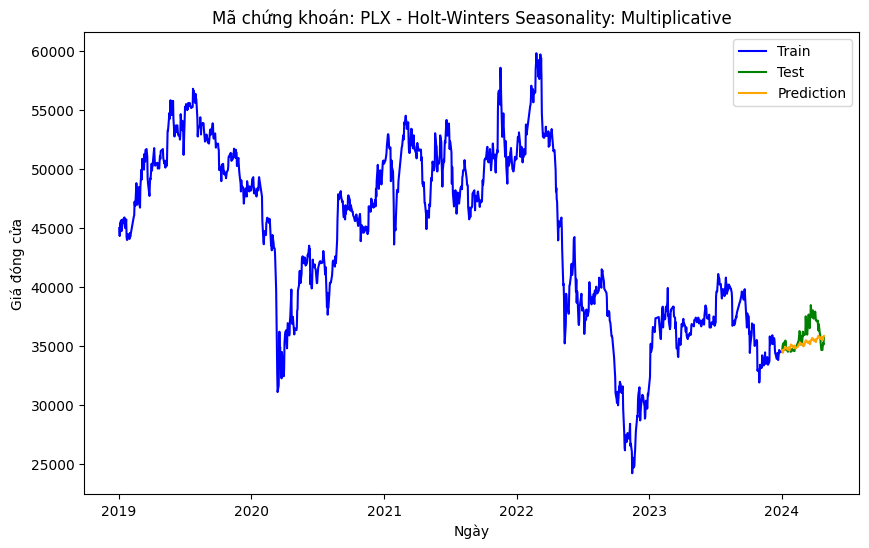

Đang xử lý mã chứng khoán (Nhân): FPT
Mã chứng khoán: FPT, MAE: 6690.670243523385, RMSE: 7918.54923031638, Seasonal: mul


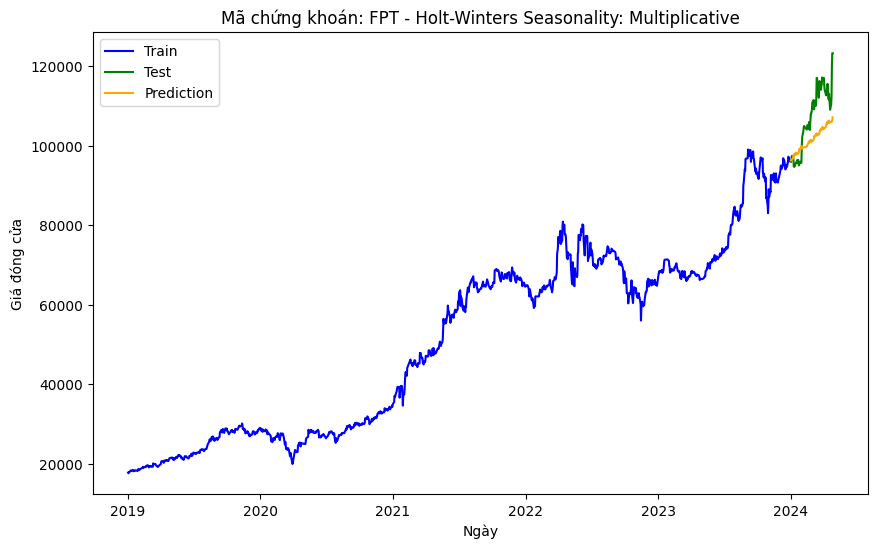

MAE Trung bình (Multiplicative): 3785.879131762771, RMSE Trung bình (Multiplicative): 4441.439553444624


In [20]:
# Xử lý Holt-Winters Multiplicative
for ticker in tickers:
    print(f"Đang xử lý mã chứng khoán (Nhân): {ticker}")

    train_df_ticker = evaluator_holt_winters.prepare_data(train_df, ticker)
    test_df_ticker = evaluator_holt_winters.prepare_data(test_df, ticker)

    forecast_multiplicative, mae_multiplicative, rmse_multiplicative = evaluator_holt_winters.fit_and_predict_holt_winters(
        train_df_ticker, test_df_ticker, ticker, seasonal_mode='mul'
    )
    evaluator_holt_winters.plot_forecast_holt_winters(train_df_ticker, forecast_multiplicative, test_df_ticker, ticker, 'Multiplicative')

# Tính toán trung bình cho Multiplicative
_, results_df_multiplicative = evaluator_holt_winters.get_results()
average_mae_mul, average_rmse_mul = evaluator_holt_winters.calculate_average_metrics(results_df_multiplicative)
print(f"MAE Trung bình (Multiplicative): {average_mae_mul}, RMSE Trung bình (Multiplicative): {average_rmse_mul}")

# Lưu kết quả Multiplicative vào CSV
evaluator_holt_winters.save_results_to_csv(results_df_multiplicative, "holt_winters_multiplicative_results.csv")
